# Counting words over time on 2015-2021 Legacy.com obituaries confirmed in DC

Author: Jaren Haber, PhD <br/>
Date: August 18, 2022 <br/>
Description: Counting specific words indicating causes of death (e.g., guns, cancer) and religious affiliation in postprocessed 2015-2021 obituaries scraped from Legacy.com in June 2022. 

## Import packages

In [1]:
import pandas as pd
import os
import re
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from nltk.text import Text # for finding word patterns

## Load & prepare data

In [2]:
# Set file paths
root = 'June_2022_postprocessed/'
stem = 'final_df_duplicates_identified-'
fpmerged = os.path.join(root, stem+'2015-2021.csv')
fpdc = os.path.join(root, stem+'2015-2021_dc.csv')

In [3]:
# Load lists of neighborhood names 
neighborhoods_long = pd.read_csv('DC_neighbourhoods_list_long.csv', header=None)[0] # 156 neighborhoods
neighborhoods_short = pd.read_csv('Health_Statistics_dc5_8_neighbourhood.csv')['Neighborhood Name'] # 49 neighborhoods

# Load list of funeral homes
funeral_homes = pd.read_excel('FuneralHomes_crosscheck.xlsx')['Funeral Home']

In [4]:
dcdf = pd.read_csv(fpdc, low_memory=False) # load full dataset

In [5]:
# prepare data
dcdf['tokens'] = dcdf['tokens'].apply(literal_eval) # recover string format from list in csv file

dcdf = dcdf.dropna(subset=['death_year']) # remove if no deathyear
dcdf = dcdf[dcdf['pub_year']>2014] # remove if erroneous publication year
dcdf = dcdf[dcdf['death_year']>2014] # remove if death year outside time window of interest
dcdf['duplicate_remove'].fillna(0.0, inplace=True) # fill in duplicates: if None, replace with zero
dcdf = dcdf[dcdf['duplicate_remove']==0.0] # remove if duplicate
dcdf = dcdf[dcdf['death_year']>=2000] # Remove if death_year before 2000

dcdf['deathday'] = dcdf['deathday'].apply(pd.to_datetime).dt.date # remove extraneous time information from death day column
dcdf['death_monthyear'] = dcdf['deathday'].apply(pd.to_datetime).dt.to_period('M') # remove extraneous time information from death day column
dcdf['pub_monthyear'] = dcdf['pubdate'].apply(pd.to_datetime).dt.to_period('M') # remove extraneous time information from death day column

In [6]:
# Collect all texts and convert into searchable object
all_obits = []
dcdf.para.apply(lambda text: all_obits.append(text)) # add each text to list
all_obits = ''.join(all_obits) # join together list into string
all_obits = re.sub(r'\s+', ' ', all_obits).strip() # clean up spacing
all_obits = all_obits.split() # tokenize
all_obits = Text(all_obits) # Convert long string into searchable object

## Word usage

### DC neighborhoods

In [7]:
print([name for name in neighborhoods_short])

['16th ST HEIGHTS', 'CATHEDRAL HEIGHTS', 'CHEVY CHASE', 'CHINATOWN', 'COLUMBIA HEIGHTS', 'CONGRESS HEIGHTS/SHIPLEY', 'DC MEDICAL CENTER', 'DOUGLASS', 'EASTLAND GARDENS', 'EDGEWOOD', 'FOREST HILLS', 'ADAMS MORGAN', 'FORT DUPONT', 'FORT LINCOLN/GATEWAY', 'GEORGETOWN', 'GEORGETOWN EAST', 'GWU', 'HILL EAST', 'HISTORIC ANACOSTIA', 'KENT/PALISADES', 'KINGMAN PARK', 'LAMOND RIGGS', 'BARNABY WOODS', 'LINCOLN HEIGHTS', 'LOGAN CIRCLE/SHAW', 'MARSHALL HEIGHTS', 'MICHIGAN PARK', 'MOUNT PLEASANT', 'NAVAL STATION & AIR FORCE', 'NAYLOR/HILLCREST', 'PETWORTH', 'SAINT ELIZABETHS', 'BELLEVUE', 'SHEPHERD PARK', 'SOUTH COLUMBIA HEIGHTS', 'STADIUM ARMORY', 'SW/WATERFRONT', 'TENLEYTOWN', 'TRINIDAD', 'TWINING', 'U ST/PLEASANT', 'UNION STATION', 'WASHINGTON HIGHLANDS', 'BLOOMINGDALE', 'WOODLEY PARK', 'WOODRIDGE', 'BRENTWOOD', 'BRIGHTWOOD', 'BRIGHTWOOD PARK', 'CAPITOL HILL']


In [8]:
print([name for name in neighborhoods_long])

['Adams Morgan', 'Columbia Heights', 'Howard University', 'Kalorama', 'LeDroit Park', 'Lanier Heights', 'Mount Pleasant', 'Park View', 'Pleasant Plains', 'Shaw', 'U Street', 'Burleith', 'Chinatown', 'Downtown', 'Dupont Circle', 'Federal Triangle', 'Foggy Bottom', 'Georgetown', 'Logan Circle', 'Mount Vernon Square', 'Penn Quarter', 'Shaw', 'Sheridan Kalorama', 'Southwest Federal Center', 'U Street', 'West End', 'American University Park', 'Berkley', 'Cathedral Heights', 'Chevy Chase', 'Cleveland Park', 'Colony Hill', 'Forest Hills', 'Foxhall', 'Friendship Heights', 'Glover Park', 'Kent', 'Massachusetts Heights', 'McLean Gardens', 'North Cleveland Park', 'Observatory Circle', 'The Palisades', 'Potomac Heights', 'Spring Valley', 'Tenleytown', 'Wakefield', 'Wesley Heights', 'Woodland Normanstone', 'Woodley Park', 'Woodmont', 'Barnaby Woods', 'Brightwood', 'Brightwood Park', 'Chevy Chase', 'Colonial Village', 'Crestwood', 'Fort Totten', 'Hawthorne', 'Manor Park', 'Petworth', 'Riggs Park', '

In [9]:
for neighb in neighborhoods_short:
    if len(neighb.split())>1: # if multi-word name...
        neighb = [word for word in neighb.split()] # turn into list to search for
    print(f'Matching to {neighb}:')
    all_obits.concordance(neighb, lines = 10)
    print()

Matching to ['16th', 'ST', 'HEIGHTS']:
no matches

Matching to ['CATHEDRAL', 'HEIGHTS']:
no matches

Matching to ['CHEVY', 'CHASE']:
Displaying 10 of 642 matches:
tired as senior vice president of Chevy Chase Bank in 2010. She served on numer
 in 1986. He and Dorothy lived in Chevy Chase DC for more than fifty years. Ser
981-2010). He was a member of the Chevy Chase Club, the Clan MacLachlan Society
7; All Saints Episcopal Church, 3 Chevy Chase Circle, Chevy Chase, MD 20815; an
7; All Saints Episcopal Church, 3 Chevy Chase Circle, Chevy Chase, MD, 20815; a
ion and reception will be held at Chevy Chase House, 5420 Connecticut Ave. NW, 
Dr. M. Milton Hyman, and moved to Chevy Chase with her family in 1940. She grad
1940. She graduated from Bethesda Chevy Chase High School. Lee met Harry at a c
golfer, Deane was a member of the Chevy Chase Club and won many trophies throug
l be held May 15 at 1 p.m. at the Chevy Chase Club, at which time the family in

Matching to CHINATOWN:
Displaying 10

In [10]:
for neighb in neighborhoods_long:
    if len(neighb.split())>1: # if multi-word name...
        neighb = [word for word in neighb.split()] # turn into list to search for
    print(f'Matching to {neighb}:')
    all_obits.concordance(neighb, lines = 10)
    print()

Matching to ['Adams', 'Morgan']:
Displaying 10 of 14 matches:
nd Ida Carlisle. Mary grew up in Adams Morgan Washington, DC. She was an avid 
rker for progressive causes, her Adams Morgan community, the Dupont Circle Vil
n welcomed into their DC home in Adams Morgan will miss his energy, humor, and
n welcomed into their DC home in Adams Morgan will miss his energy, humor, and
 grew up in the Mt. Pleasant and Adams Morgan neighborhoods, in a lively, if s
N (Age 86) Long time resident of Adams Morgan in Washington, DC, peacefully pa
ent he was a Commissioner at ANC Adams Morgan community. He collected turkeys 
d to Washington, DC. He lived in Adams Morgan where he enjoyed walking the nei
age of 65 in his neighborhood of Adams Morgan in Washington, D. C. , after a t
aryland, finally settling to the Adams Morgan area in 1929. After graduating f

Matching to ['Columbia', 'Heights']:
Displaying 5 of 5 matches:
ill Harris. She grew up in the Columbia Heights section of Washington, DC in a
 Dep

Displaying 10 of 1030 matches:
0 am until time of service 11 am at Capital Baptist church, 3504 Gallows Road, 
999 -- "Good Scout" Award, National Capital Area Council, 2004 -- The Montgomer
 & Lymphoma Society of the National Capital Chapter, Donor Services, PO Box 980
arkinson Foundation of The National Capital Area, 8830 Cameron St., #201, Silve
DC. Interment following at National Capital Hebrew Cemetery, Capitol Heights, M
m. until time of funeral 12 Noon at Capital Hill Baptist Church, 525 A. St., NE
he "Best Columnist" in the nation's capital in 2011.Edward, a loving husband, f
h Paint Co. before joining National Capital Building & Supply, which after 24 y
 be a cherished member of the Sands Capital Management family, where she worked
egional effort to keep the National Capital Poison Control Center in operation.

Matching to ['District', 'of', 'Columbia']:
Displaying 10 of 646 matches:
 a member of OES Chapter #17 District of Columbia and a member of Wisconsin Av
 of the Handica

In [11]:
all_obits.concordance(['grew','up','in'], lines = 20)

Displaying 20 of 1543 matches:
(Petrokofsy) and Kenneth Gold. He grew up in Brighton Beach, Brooklyn and grad
17. Born in New York City, NY she grew up in Washington, DC, where she attende
 Harriett (Humphries) Mehoves. He grew up in Alexandria, VA and just off Capit
is passing on March 29, 2016. Ned grew up in New Jersey, attended Florida Stat
lness.John was born in Boston and grew up in New York City, NY; he graduated f
ay 29, 1946 in Washington, DC. he grew up in Connecticut and West Lafayette, I
lin was born in Washington DC and grew up in Potomac, Maryland, where she grad
 to James and Alice Walburn. Gale grew up in Washington, DC and attended Weste
of Margret Roberts Graham, Warren grew up in Valdosta, GA, was class President
 December 21, 1917 in Chicago and grew up in Oak Park. She attended Rockford C
dren. A native Washingtonian, she grew up in Spring Valley with four sisters a
e, NC on August 3, 1925. Dr. West grew up in Henderson, TN, where he completed
er life in Northern V

In [12]:
all_obits.concordance(['raised','in'], lines = 20)

Displaying 20 of 1370 matches:
as born on MacArthur Boulevard and raised in Washington, DC. She attended Weste
October 5, 1941 in Washington, DC, raised in Alexandria, VA, and later lived in
 Corporation. Clifford Kendall was raised in Washington, DC by a single mother 
d Denise Pratte.Hilda was born and raised in Missouri and moved to the Washingt
years old. Mr. Stepno was born and raised in Holyoke, Massachusetts and was the
d away on April 7, 2016. Carol was raised in Arlington and moved to Fairfax Cit
Sara Jane (Neagle) Moore. Ward was raised in Paterson, NJ and Greeley, CO befor
t (Dinneen) and Thomas F. Ryan and raised in Springfield Massachusetts. He was 
5 at Casey House Hospice. Born and raised in Washington, DC, he was a 1973 grad
ashington, DC, Sigrun was born and raised in Reykjavik, Iceland. She graduated 
rated her 107th birthday. Born and raised in Williamsport, PA, Sophia was one o
s and one younger brother. She was raised in Washington where she attended DC P
amily at 

### Funeral homes

In [13]:
for home in funeral_homes:
    if len(home.split())>1: # if multi-word name...
        home = [word for word in home.split()] # turn into list to search for
    print(f'Matching to {home}:')
    all_obits.concordance(home, lines = 20)
    print()

Matching to ['Austin', 'Royster', 'Funeral', 'Home']:
Displaying 1 of 1 matches:
ry. Services entrusted to Austin Royster Funeral Home ANDREW WYNN DYER, SR., Es

Matching to ['B', 'K', 'Henry', 'Funeral', 'Chapel']:
no matches

Matching to ['B.K.', 'Henry', 'Funeral', 'Home']:
Displaying 1 of 1 matches:
0020. Services entrusted to B.K. Henry Funeral Home Inc. TERESA HERMINIA MOSQUE

Matching to ['BK', 'Henry', 'Funeral', 'Home']:
Displaying 1 of 1 matches:
d., NE Washington, DC 20008. BK Henry Funeral Home is handling the arrangements

Matching to ['BACON', 'FUNERAL', 'HOME']:
Displaying 2 of 2 matches:
like to thank the services of Bacon Funeral Home of Washington, DC. BARBARA A.
rginia. Arrangements by W. H. Bacon Funeral Home Inc.GIBBER ERMA FRANCES GIBBE

Matching to ['Bianchi', 'Funeral', 'Service']:
Displaying 6 of 6 matches:
nt only. Please contact the Bianchi Funeral Service at (202) 529-5579 for an ap
day, January 6, 2021 at the Bianchi Funeral Service Chapel, 814 Upshur Stree

no matches

Matching to ['Riverdale', 'Park', 'Crematory']:
no matches

Matching to ['Robert', 'G', 'Mason', 'Funeral', 'Home']:
no matches

Matching to ['Robert', 'O.', 'Freeman', 'Funeral', 'Services']:
no matches

Matching to ['Robinson', 'Company', 'Funeral', 'Home']:
no matches

Matching to ['Roger', 'J', 'Mason', 'Funeral', 'Service']:
no matches

Matching to ['Ronald', 'Taylor', 'II', 'Funeral', 'Home']:
Displaying 4 of 4 matches:
also be live streamed at Ronald Taylor II Funeral Home Facebook Page starting a
 Bell, Sr., officiating. Ronald Taylor II Funeral home will be rendering the se
 11 a.m. Arrangements by Ronald Taylor II Funeral Home in Washington, DC.SHARON
are being handled by the Ronald Taylor II Funeral Home at 1722 North Capitol St

Matching to ['Snead', 'Funeral', 'Home']:
Displaying 3 of 3 matches:
metery. Services entrusted to Snead Funeral Home Annie Bowens "Wray" Entered i
day, March 26,2016 10 a.m. at Snead Funeral Home and Cremation, 5732 Georgia A
Saturday, 

### Newspapers

In [14]:
all_obits.concordance(['washington', 'post'], lines = 30)

Displaying 30 of 166 matches:
rything literary, including the Washington Post and New York Times crosswords e
ypes and brands. The celebrated Washington Post cartoonist, Herblock, likened t
or the Wall Street Journal, the Washington Post and Advertising Age, among othe
for a changing world. As a 1980 Washington Post article quoted her, "It just in
eder, a 33 year employee of The Washington Post at the Southeast DC Plant, belo
 then was a distributor for the Washington Post from 1989 through 2005. He is s
and daughter, alongside a daily Washington Post delivery and Detroit Tigers gam
rything literary, including the Washington Post and New York Times crosswords e
ington, DC. [WINX was the first Washington Post owned radio station.] Buddy wen
 X stood for experimental). The Washington Post sold WINX-AM and bought WTOP-AM
first teacher to be awarded the Washington Post Agnes Meyer Teacher of the Year
med by fans of her reports. The Washington Post wrote, "Jurey was the one media
ed as a re

### Specific causes of death

In [15]:
all_obits.concordance(['died', 'from'], lines = 20)

Displaying 20 of 66 matches:
by Woods community in Fairfax, VA, died from COVID-19 at the Virginia Hospital 
d shortly thereafter her son Jimmy died from cancer. In June of 2020 her daught
y his side. Mr. Grenier was 87 and died from heart failure. In the last weeks o
1. Even though he never smoked, he died from complications of lung cancer due t
g Arbor of Fredericksburg, VA. She died from complications as a result of her l
l in death as she was in life, she died from complications resulting from an at
up the night, heading south. Wendy died from complications of Alzheimer's disea
pping service, Press Intelligence, died from complications of a stroke on Augus
 days shy of his 97th birthday and died from complications of dementia. He was 
nate/ Bolivar Amable Paez (Age 84) Died from complications of surgery in Quito,
gs. It was tough for Dad after Mom died from pancreatic cancer. He passed away 
predeceased by his wife Yasmin who died from ALS in 2011. He is survived by his
predeceased

In [16]:
all_obits.concordance(['cause', 'of', 'death'], lines = 20)

Displaying 20 of 79 matches:
l 8, 2015 at the age of 33. His cause of death was a heart incident related to
 Florida on April 11, 2015. The cause of death was a blood infection caused by
cording to his son William, the cause of death was complications from a stroke
 Olney, Maryland. The immediate cause of death was sepsis due to sars-cov-2. A
 on Monday, April 20, 2015. Her cause of death was cancer. Born on January 22,
016 at Georgetown Hospital. The cause of death was complications following sur
side at INOVA Fairfax Hospital. Cause of death was defined as the onset of Has
 and his books by his side. The cause of death was complications from pneumoni
, 2021 at Fairfax Hospital. The cause of death was complications of rib fractu
t Inova Fair Oaks Hospital. His cause of death was heart failure, lung disease
ed widely around the world. The cause of death was complications from pancreat
uanacaste Province, Costa Rica. Cause of death was hemorrhage of the upper dig
f the District of Colum

In [17]:
all_obits.concordance('killed', lines = 50)

Displaying 50 of 50 matches:
ed his forty-four Marine classmates killed in Vietnam.Jim is survived by his w
lier and Ronnie Moffit, the victims killed in a car bombing on Sheridan Circle
men of 1939, we thought we would be killed because those guys were huge! Farme
 crash land. His radio operator was killed and several others were seriously w
families of loved ones who had been killed in World War II. She spoke of it as
d to serve in the U.S. Army and was killed in action July 12, 1944. Buddy spen
plosions and fires. 13 Marines were killed and over 70 injured. The official r
on in the nation's capital, who was killed in a traffic accident on the evenin
during World War II. Her father was killed in 1943 on the Eastern Front. Rosem
aval Academy and an aviator who was killed in the Pacific during World War II.
Arkady Shamis. Mrs. Shamis was also killed in the crash. Daniel is the grandso
orth Bagley, the only naval officer killed in the Spanish-American War. His fa
d out that his entire u

In [18]:
all_obits.concordance('murdered', lines = 20)

Displaying 6 of 6 matches:
 All-American Lacrosse player) was murdered walking home on a Saturday night i
lty and inhumanity after the Nazis murdered her family. She was left alone as 
y the end of the war the Nazis had murdered his entire family. After liberatio
 Nearly everyone in her family was murdered in the Holocaust. Bud dedicated hi
g this time, Jacques' parents were murdered at Auschwitz concentration camp. F
ated to learn her parents had been murdered by the Nazis, she was reunited wit


In [19]:
all_obits.concordance('covid', lines = 20)

Displaying 20 of 252 matches:
se, will be truly missed. Due to the COVID 19 pandemic the Funeral will be priv
al Church in Wake Forest, NC. Due to Covid restrictions, attendance will be via
pouse Peggy Baker brought her out of COVID isolation to live with them in Ashev
ential Inauguration, and getting her COVID vaccine. She made a whole new group 
 France at the age of 82 following a Covid diagnosis. George was born in Ithaca
ices from 11 a.m. to 12 noon. Due to Covid restrictions, the services at 11 a.m
ollege Park. Regrettably, due to the COVID pandemic, it will be limited to imme
rs. Monroe on a limited basis due to Covid 19 regulations from 9 a.m. until 9:3
 the American Cancer Society. Due to Covid the family will offer an online live
n and six greatgrandchildren. Due to covid concerns funeral and burial will be 
 held at a later date because of the Covid restrictions on gatherings.IRMA BIER
 will be held later in the year when Covid restrictions allow. Arrangements by 
7 Salt Poi

### 'Survived by': Who is left behind

In [20]:
all_obits.concordance(['survived', 'by'], lines = 20)

Displaying 20 of 22848 matches:
 on Monday, March 23, 2015. He is survived by his beloved wife, Lauren Daughtry
ted with his granddaughter. He is survived by longtime partner, William Carroll
on Tuesday, March 24, 2015. He is survived by his beloved wife of 29 years, Sha
k and Barbara Thompson. Lenora is survived by their two sons, Harold J. Spelman
lyn Vick Miller, deceased, she is survived by her brothers, Robert Frederick Mi
nd Phyllis A. McCain. She is also survived by six grandchildren, nine great-gra
ther Francis W. Triplett.Harry is survived by his wife Ernestine Triplett of In
on-in-law Carl T. Rowan, Jr.He is survived by his lifelong friend Rita Best of 
on Monday, March 28, 2016. She is survived by her children, Reginald D. Perkins
e late Claudia Batts. She is also survived by grandmother, Ellen Simpkins; sist
ther Marion Gertrude "Jim". He is survived by his son Tim (Julia), daughter Jud
16 from 2 to 4 p.m. Dr. Kimmel is survived by his wife of 58 years, Brenda H. K
reedomfr

In [21]:
all_obits.concordance(['preceded', 'in', 'death'], lines = 20)

Displaying 20 of 4893 matches:
ddition to his parents, he was preceded in death by his youngest brother Franci
ed 38 years of service. He was preceded in death by his beloved wife Mary, his 
dren, Murphy and Zeena. He was preceded in death by a daughter, Deb Cato. As pe
and Constance Williams. He was preceded in death by his parents Paul A. Quander
Avenue Baptist Church. She was preceded in death by her parents Ida C. and Fred
nd Katherine (Davidson) McCoy. Preceded in death by her parents, husband of 38 
r parents and husband, she was preceded in death by her ever loving sister, Sis
ammar Gaddafi to power. He was preceded in death by his brother, Carl Mueller, 
Bobbie Cross and Debbie Moore. Preceded in death by his parents, James Henry an
travel, and DC sports. Rob was preceded in death by his father and is survived 
 nieces and nephews. Mazie was preceded in death by her sister, Alice Fields Ca
ddition to his parents, he was preceded in death by his wife, Marian Elizabeth 
loved one

## Count words

### General functions

In [22]:
"""
def count_words_from_keyword (tokens, keyword=''):
    '''Counts number of times a given keyword appears in a list of tokens (e.g., from an obituary).
    
    Parameters:
        tokens (list of str): tokenized, preprocessed segment of text
        keyword (str): word to match in tokens
        
    Returns:
        m (int): Number of matches'''

    m = 0
    for word in tokens:
        if word==keyword:
            m += 1
        
    return m
"""

"\ndef count_words_from_keyword (tokens, keyword=''):\n    '''Counts number of times a given keyword appears in a list of tokens (e.g., from an obituary).\n    \n    Parameters:\n        tokens (list of str): tokenized, preprocessed segment of text\n        keyword (str): word to match in tokens\n        \n    Returns:\n        m (int): Number of matches'''\n\n    m = 0\n    for word in tokens:\n        if word==keyword:\n            m += 1\n        \n    return m\n"

In [23]:
def count_words_from_keyword_list (para, keyword_list=[]):
    '''Counts number of times a given list of keywords appears in a list of tokens (e.g., from an obituary).
    
    Parameters:
        para (str): preprocessed segment of text
        keyword_list (list of str): list of words to match in tokens, separated by commas
        
    Returns:
        m (int): Number of matches'''
    
    m = 0
    #for word in para: # go through each word
    #    if word in keyword_list:
    #        m += para.count(word.lower())
    
    for keyword in keyword_list: # go through each keyword
        m += para.count(keyword.lower()) # add these matches to total
        
    return m

In [24]:
def get_counts(df, keywords, list_input=False, varname=''):
    '''Finds ratios that a keyword or list of keywords consists of in tokens.
    Input a DataFrame and get statements and new columns.
    
    Parameters:
        df (DataFrame): contains cols `tokens`, `tokens_count`, `para`, and `url`
        keywords (str or list): could be one keyword (str) or a list of keywords (each a string)
        list_input (boolean): whether a list of keywords was input; if False (the default), only a single keyword is assumed
        varname (str, optional if using single keyword): name to use when naming output columns
    
    Returns:
        df (DataFrame): modified DataFrame with two new columns, one for count of matches and one for ratio of matches to total words
    '''
    
    # Check for errors
    if not keywords or len(keywords)==0: # if no keywords given, throw error
        print("No keywords given, operation cancelled.\nPlease give a keyword (str) or keyword list (list of str).")
        return
    
    '''
    # Determine number of words/phrases input
    try:
        if len(keywords.split()) > 1: # if word list is given, check each word for belonging in that list
            list_input = True
        else:
            list_input = False
    except AttributeError:
        list_input = True
    '''
    
    
    # Count words
    if list_input: # if word list is given, check each word for belonging in that list
        #print("Matching to keyword list: {keywords}...")
        # define names of output columns
        if not varname:
            print("Please provide a name for the output columns as `varname`. Halting.")
            return
        countvar = varname + '_count' # number of mentions of keyword(s)
        ratiovar = varname + '_ratio' # proportion of words accounted for by keyword(s)
        boolvar = varname + '_bool' # boolean indicator of whether there are ANY mentions of keyword(s)
        
        df[countvar] = df['para'].apply(lambda para: count_words_from_keyword_list(para.lower(), keyword_list=[keyword.lower() for keyword in keywords]))
        #df[countvar] = df['tokens'].apply(lambda tokens: count_words_from_keyword_list(tokens, keyword_list=[keyword.lower() for keyword in keywords]))

    else: # if only one keyword given, match based on that
        #print(f"Matching to '{keywords}'...")
        # define name of output columns
        if varname=='':
            varname = keywords # set varname to whatever keyword was input
        countvar = varname + '_count' # number of mentions of keyword(s)
        ratiovar = varname + '_ratio' # proportion of words accounted for by keyword(s)
        boolvar = varname + '_bool' # boolean indicator of whether there are ANY mentions of keyword(s)
        
        df[countvar] = df['para'].apply(lambda para: para.lower().count(keywords.lower()))
        #df[countvar] = df['tokens'].apply(lambda tokens: count_words_from_keyword(tokens, keyword=keywords.lower()))
    
    
    if not (df[countvar]>0).any() or len(df[df[countvar]>0])==0: # if no matches found, exit
        print('No matches found.')
        return df

    
    # Calculate average mentions and such
    df[ratiovar] = df[countvar]/df['tokens_count'] # compute proportion of words accounted for by keyword(s)
    df[boolvar] = df[countvar] > 0 # compute for each row whether there are ANY matches to keyword(s) (True/False)
    num_mentions = len(df[df[countvar]>0]) # total number of mentions
    avg_mentions = df[df[countvar]>0][countvar].mean() # average mentions
    max_mentions = df[df[countvar]>0][countvar].max() # max number of mentions
    max_ratio = df[df[countvar]>0][ratiovar].max() # max ratio of mentions to whole text
    
    max_mentions_row = df.reset_index().iloc[df.reset_index()[countvar].idxmax(skipna = False)][['para', 'url']] # row with most mentions
    max_mentions_text = max_mentions_row.para # text segment with most mentions
    #max_mentions_url = max_mentions_row.url # url of text segment with most mentions
    max_ratio_row = df.reset_index().iloc[df.reset_index()[ratiovar].idxmax(skipna = False)][['para', 'url']] # row with most mentions
    max_ratio_text = max_ratio_row.para # text segment with most mentions
    #max_ratio_url = max_ratio_row.url # url of text segment with most mentions
    randrow = df[df[countvar]>0].sample()[['para', 'url']] # random row that mentions keyword(s)
    randtext = randrow['para'].values[0] # text of that random row
    #randurl = randrow['url'].values[0] # url of that random row
    
    
    # Print text output
    print(f"Keywords: {keywords}")
    print(f"Name of resulting columns: {countvar, ratiovar}\n")
    print(f"Frequency of these word(s) in data:\n")
    print(df[countvar].describe())
    print()
    
    if list_input: # list of keywords
        print(f"Out of {len(df)} obituaries confirmed in DC:\n")
        print(f"{num_mentions} mention a word in {keywords}")
        print(f"These words appear a total of {df[countvar].sum()} times")
        print(f"For texts containing any of these words, on average they mention them {avg_mentions} times, and at most they mention them {max_mentions} times")
        for keyword in keywords:
            all_obits.concordance(keyword, lines = 15)
    else: # single keyword
        print(f"Out of {len(df)} obituaries confirmed in DC:")
        print(f"{num_mentions} mention '{keywords}'") 
        print(f"'{keywords}' appears a total of {df[countvar].sum()} times")
        print(f"For texts containing '{keywords}', on average they mention it {avg_mentions} times.")
        all_obits.concordance(keywords, lines = 30)
    print()
    
    print(f"At most, there are {max_mentions} mentions of the keyword(s). That's this obituary:")
    #print(max_mentions_url)
    print(max_mentions_text)
    print()
    print(f"The highest ratio of keyword(s) mentions to the full text is {max_ratio}. That's this obituary:")
    #print(max_ratio_url)
    print(max_ratio_text)
    print()
    print("Finally, here's a random obituary that mentions the keyword(s):")
    #print(randurl)
    print(randtext)
    print()
    print()

    
    # Create line plots of how counts change over different periods of time
    show_plots(df, countvar, ratiovar, boolvar, varname)
    
    
    # Return DF with output columns
    return df

In [25]:
def show_plots(df, countvar, ratiovar, boolvar, varname):
    '''Groups data by different time periods and creates line plots of how keyword counts change over time.
    
    Parameters:
        df (DataFrame): contains cols `countvar`, `ratiovar`, `death_monthyear`, `death_year`, `death_month`, and `pub_monthyear`
        countvar (str): column name indicating count of keyword(s)
        ratiovar (str): column name indicating ratio of keyword(s) at level of text (i.e., obit paragraph)
        boolvar (boolean): column name indicating whether there are ANY mentions of keyword(s) at level of text (i.e., obit paragraph)
        varname (str): name for output columns
    
    Returns:
        shows plots
    '''
    
    # Group DataFrame by different periods of time, aggregate counts for each
    #grouped_deathdate = df.groupby(by = 'deathday') # group obits by date of DOD
    counts_by_deathmonthyear = df.groupby(by = 'death_monthyear')[countvar].sum() # group obits by month and year of DOD
    counts_by_pubmonthyear = df.groupby(by='pub_monthyear')[countvar].sum() # group obits by month of DOD
    counts_by_pubyear = df.groupby(by='pub_year')[countvar].sum() # group obits by month of DOD
    counts_by_deathyear = df.groupby(by='death_year')[countvar].sum() # group obits by year of DOD
    counts_by_deathmonth = df.groupby(by='death_month')[countvar].sum() # group obits by month of DOD
    
    # Calculate proportion of texts that mention keyword(s) in given month-year and year: 
    # Number of texts that mention a keyword / total number of texts in that period
    ratio_mentions_monthyear = df.groupby(by = 'death_monthyear')[boolvar].sum() / df.groupby(by = 'death_monthyear').index.count()
    ratio_mentions_year = df.groupby(by = 'death_year')[boolvar].sum() / df.groupby(by = 'death_year').index.count()
    
    
    # Show plots of counts
    counts_by_deathmonthyear.plot.line(
        #x = 'death_monthyear', 
        #y = countvar, 
        title = f'Mentions of {varname} over death dates', 
        xlabel = 'Month and year of death', 
        ylabel = f"Number of obituary mentions of '{varname}'", 
        figsize = (16,8))
    #sns.regplot(x = 'death_monthyear', y = countvar, data = counts_by_deathmonthyear) # TODO: Get line of best fit working
    plt.show()
    
    ratio_mentions_monthyear.plot.line(
        title = f'Prevalence of mentions of {varname} by death date', 
        xlabel = 'Month and year of death', 
        ylabel = f"Proportion of obituaries that mention '{varname}'", 
        figsize = (16,8))
    #sns.regplot(x = 'death_monthyear', y = countvar, data = ratio_mentions_monthyear) # TODO: Get line of best fit working
    plt.show()
    
    ratio_mentions_year.plot.line(
        title = f'Prevalence of mentions of {varname} by year of death', 
        xlabel = 'Year of death', 
        ylabel = f"Proportion of obituaries that mention '{varname}'", 
        figsize = (16,8))
    #sns.regplot(x = 'death_year', y = countvar, data = ratio_mentions_year) # TODO: Get line of best fit working
    plt.show()
    
    counts_by_pubmonthyear.plot.line(
        title = f'Mentions of {varname} by publication dates', 
        xlabel = 'Month and year of obituary publication', 
        ylabel = f"Number of obituary mentions of '{varname}'", 
        figsize = (16,8))
    #sns.regplot(x = 'pub_monthyear', y = countvar, data = counts_by_pubmonthyear) # TODO: Get line of best fit working
    plt.show()
    
    counts_by_pubyear.plot.line(
        title = f'Prevalence of mentions of {varname} by year of publication', 
        xlabel = 'Year of obituary publication', 
        ylabel = f"Proportion of obituaries that mention '{varname}'", 
        figsize = (16,8))
    #sns.regplot(x = 'pub_year', y = countvar, data = counts_by_pubyear) # TODO: Get line of best fit working
    plt.show()
    
    counts_by_deathyear.plot.line(
        title = f'Mentions of {varname} by year of death', 
        xlabel = 'Year of death', 
        ylabel = f"Number of obituary mentions of '{varname}'", 
        figsize = (16,8))
    #sns.regplot(x = 'death_year', y = countvar, data = counts_by_deathyear) # TODO: Get line of best fit working
    plt.show()
    
    counts_by_deathmonth.plot.line(
        title = f'Mentions of {varname} by month of death', 
        xlabel = 'Month of death', 
        ylabel = f"Number of obituary mentions of '{varname}'", 
        figsize = (16,8))
    #sns.regplot(x = 'death_month', y = countvar, data = counts_by_deathmonth) # TODO: Get line of best fit working
    plt.show()

### Specific causes of death

#### 'Cancer'

Keywords: cancer
Name of resulting columns: ('cancer_count', 'cancer_ratio')

Frequency of these word(s) in data:

count    31327.000000
mean         0.111118
std          0.478224
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         20.000000
Name: cancer_count, dtype: float64

Out of 31327 obituaries confirmed in DC:
2456 mention 'cancer'
'cancer' appears a total of 3481 times
For texts containing 'cancer', on average they mention it 1.4173452768729642 times.
Displaying 30 of 2107 matches:
t donations be made to the American Cancer Society. NAOMI M. WATSON On Thursda
e Georgetown Lombardi Comprehensive Cancer Center, the Howard University Schoo
 memory can be made to the American Cancer Society. Services entrusted to Sage
ease send donations to the American Cancer Society, P.O. Box 22478, Oklahoma C
areer nurse serving as the Chief of Cancer Nursing Service, for the Clinical C
t donations be made to the American Cancer Society (m.cancer.

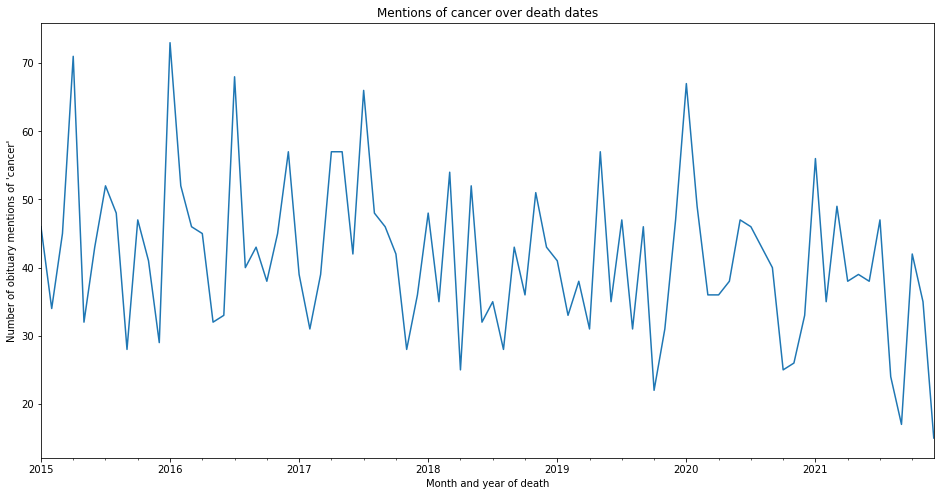

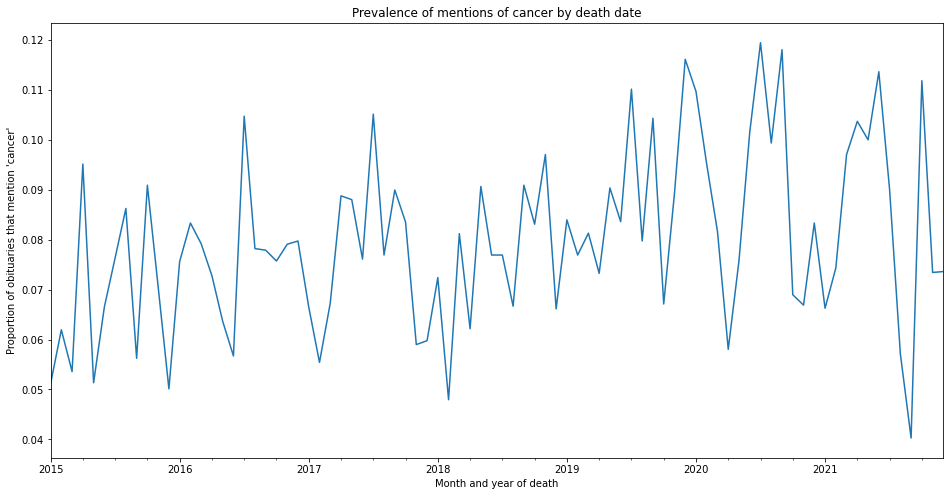

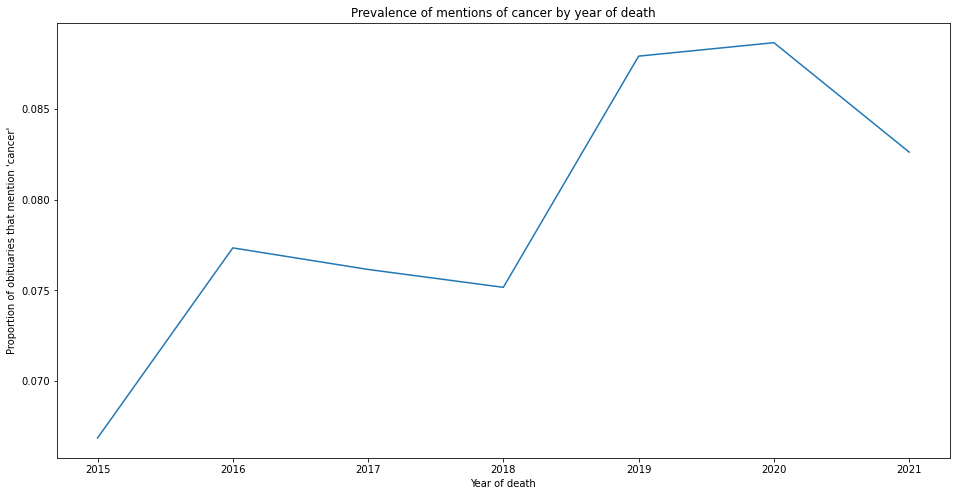

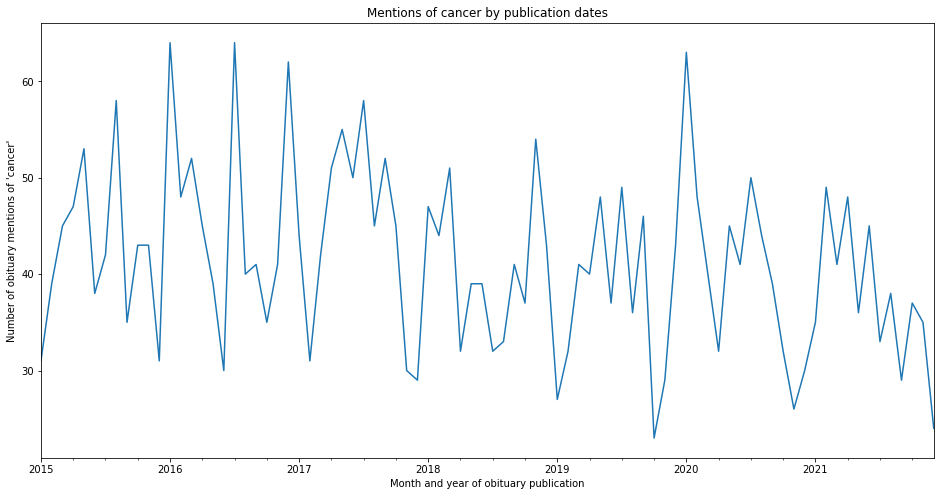

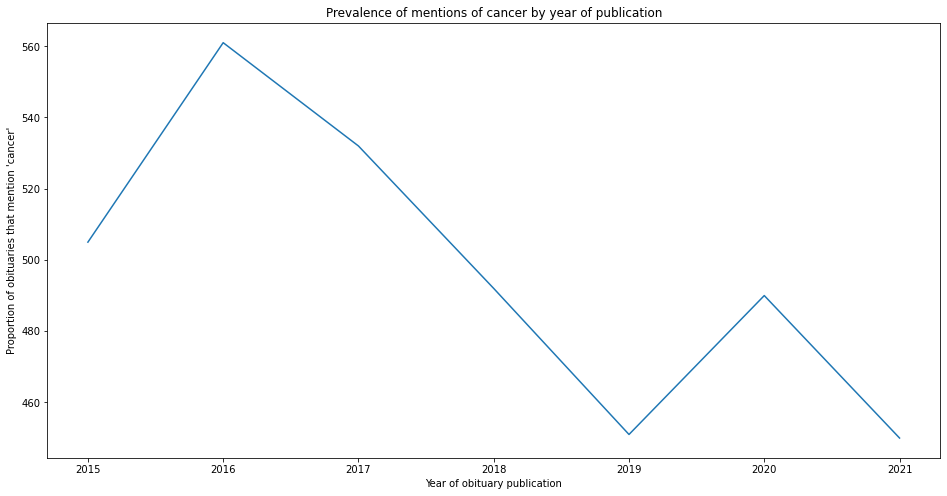

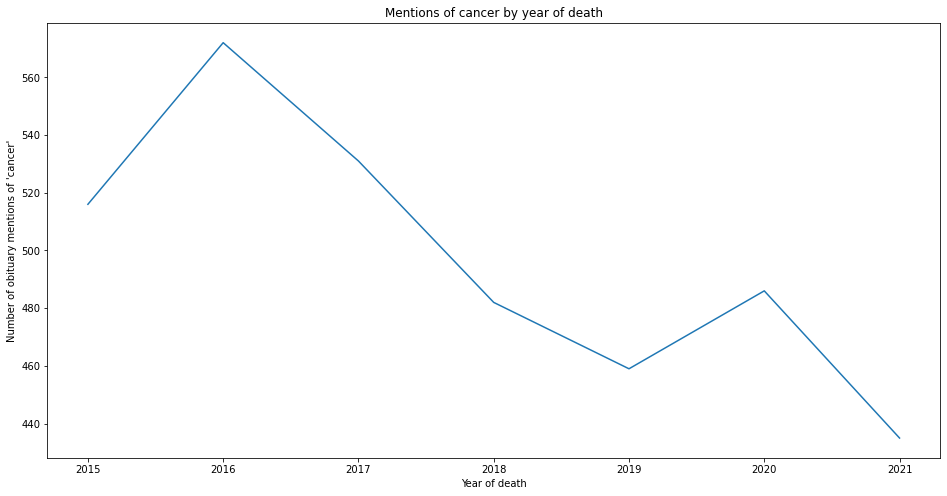

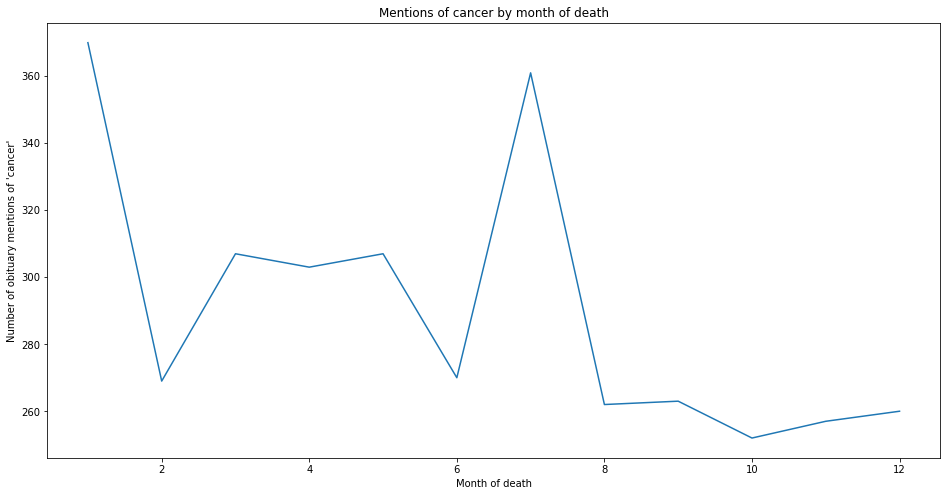

In [26]:
dcdf = get_counts(dcdf, 'cancer')

#### 'AIDS'

Keywords: AIDS
Name of resulting columns: ('AIDS_count', 'AIDS_ratio')

Frequency of these word(s) in data:

count    31327.000000
mean         0.003256
std          0.068191
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: AIDS_count, dtype: float64

Out of 31327 obituaries confirmed in DC:
85 mention 'AIDS'
'AIDS' appears a total of 102 times
For texts containing 'AIDS', on average they mention it 1.2 times.
Displaying 30 of 51 matches:
arities, including the Gift of Peace AIDS Hospice for which they made dinners 
be made to the Semper Fi Fund, which aids military families in recovery from t
ommunications, for the International AIDS Vaccine Initiative (IAVI), where she
hat would ensure universal access to AIDS vaccines in their countries. She was
vard University where she focused on AIDS prevention in Africa. Katy published
Director of Financial Sustainability AIDS coordinator at the State Department.
hese when she vo

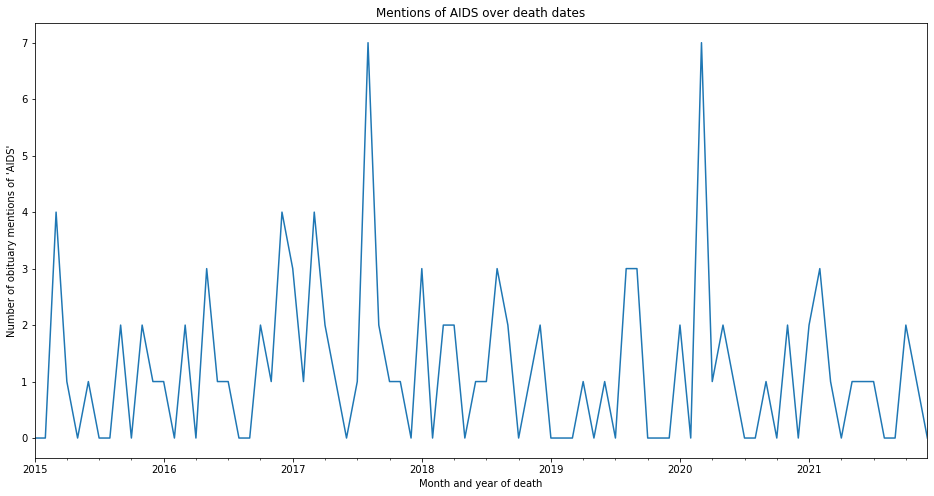

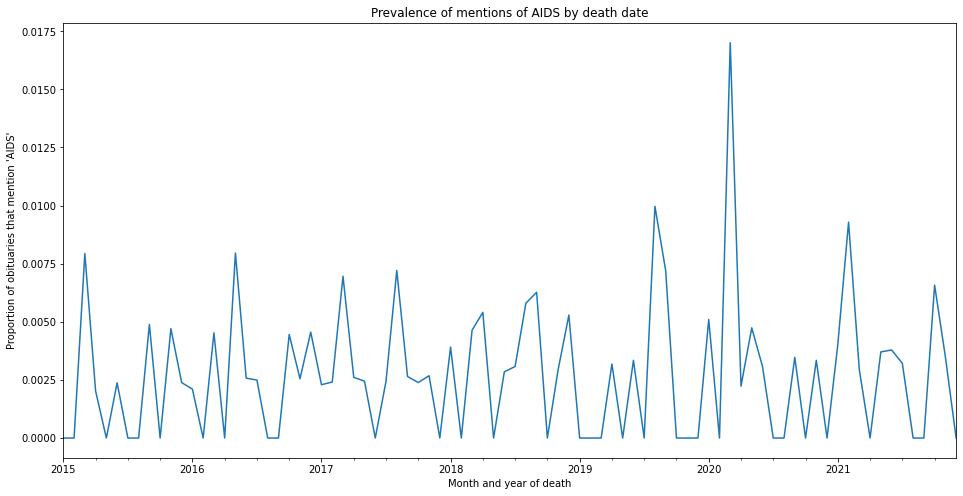

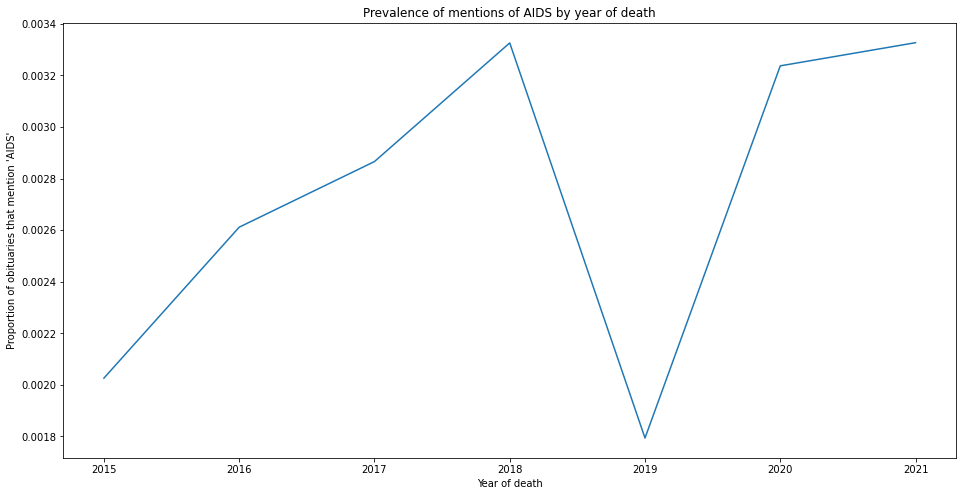

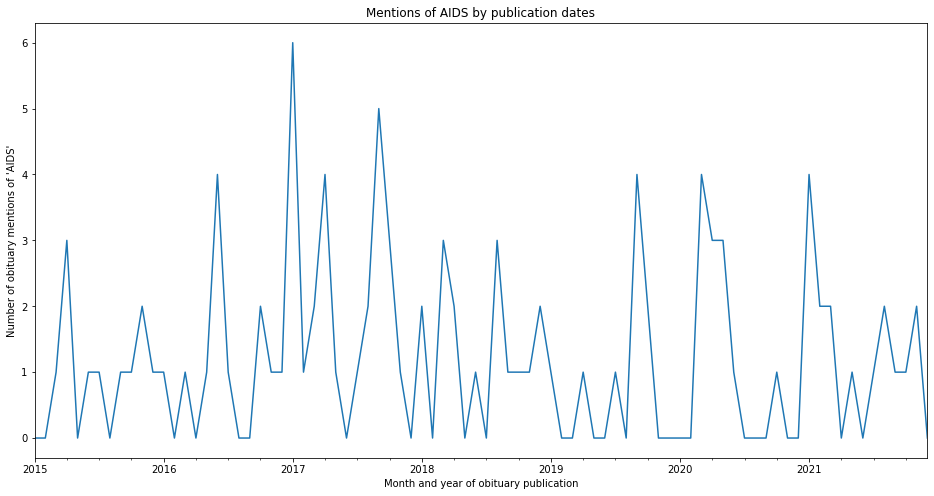

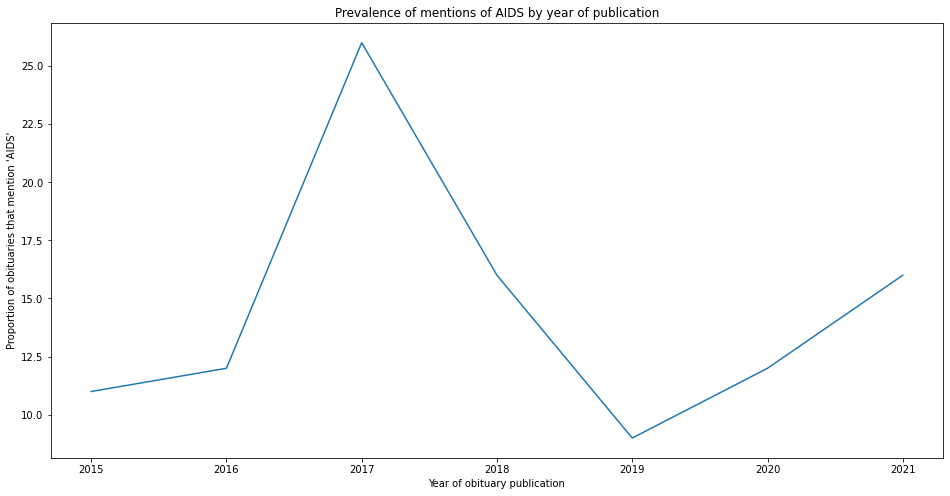

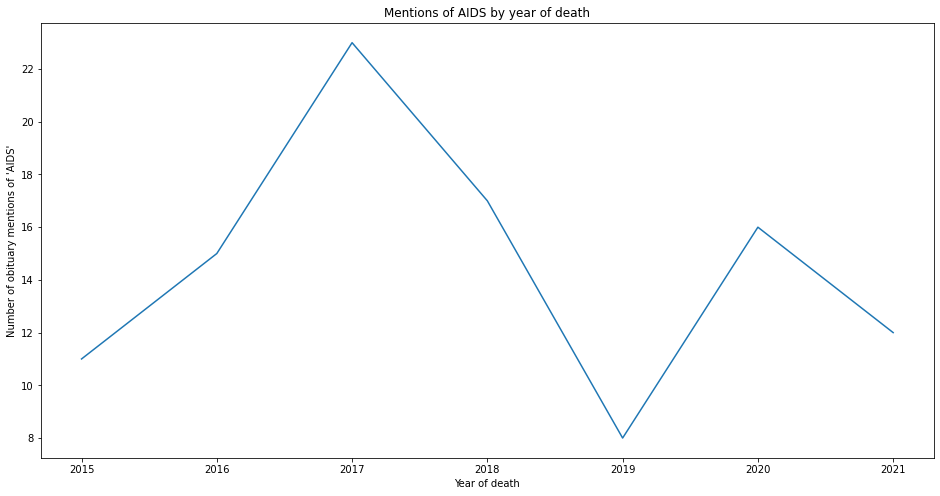

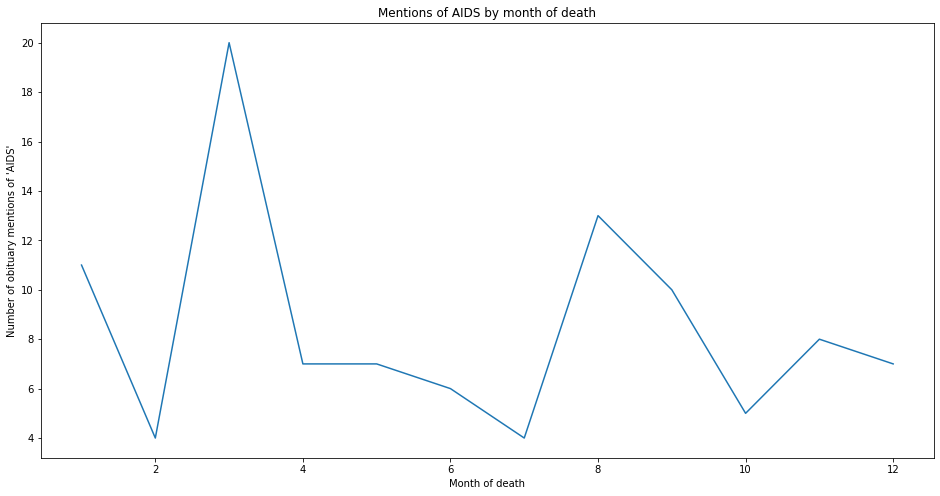

In [27]:
dcdf = get_counts(dcdf, 'AIDS')

#### Words related to gun violence

Keywords: gun
Name of resulting columns: ('gun_count', 'gun_ratio')

Frequency of these word(s) in data:

count    31327.000000
mean         0.017397
std          0.278374
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         20.000000
Name: gun_count, dtype: float64

Out of 31327 obituaries confirmed in DC:
327 mention 'gun'
'gun' appears a total of 545 times
For texts containing 'gun', on average they mention it 1.6666666666666667 times.
Displaying 30 of 68 matches:
y Jr. in 1981 suing the assassin, the gun manufacturers and distributors of the
ntegrated fire control specialist and gun mechanic. In 1958, Steve moved to Bet
 enjoy donations in his honor to stop gun violence and preserve trees.FAYE F. C
ional plea to pass the Brady Bill for gun control. Most importantly, and throug
 with his family, Richard was an avid gun shooter and collector, as well as an 
cupational Medicine at the U.S. Naval Gun Factory and on the Naval Hospital Med
m

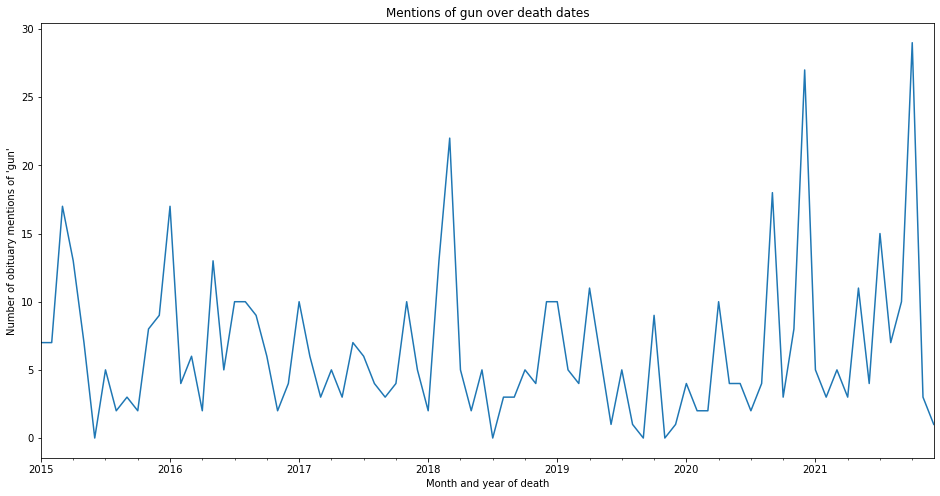

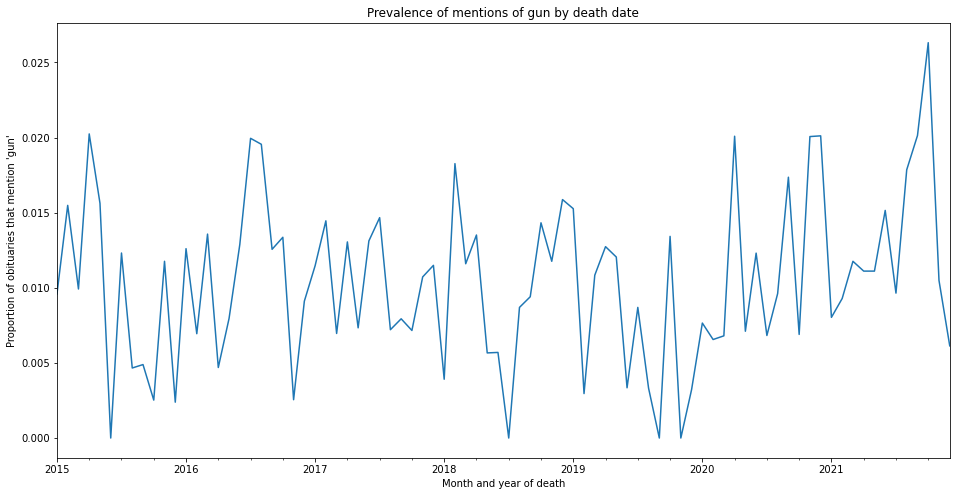

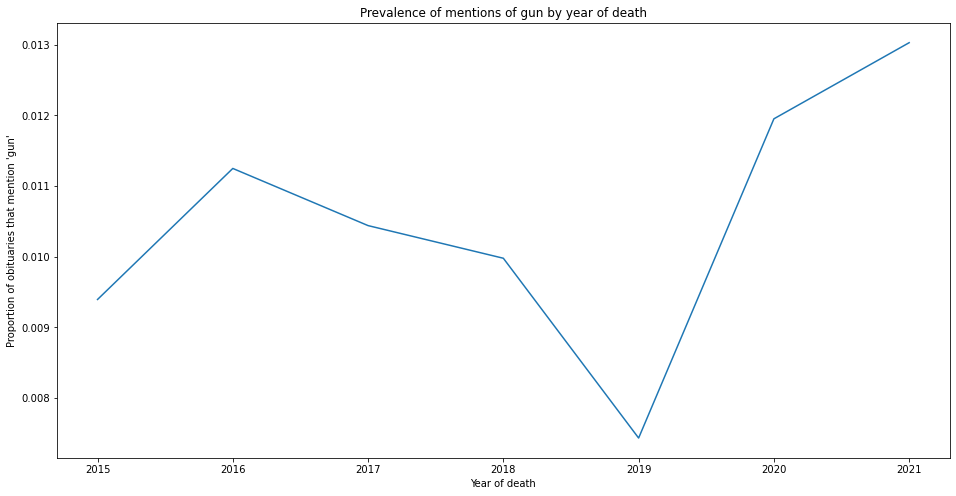

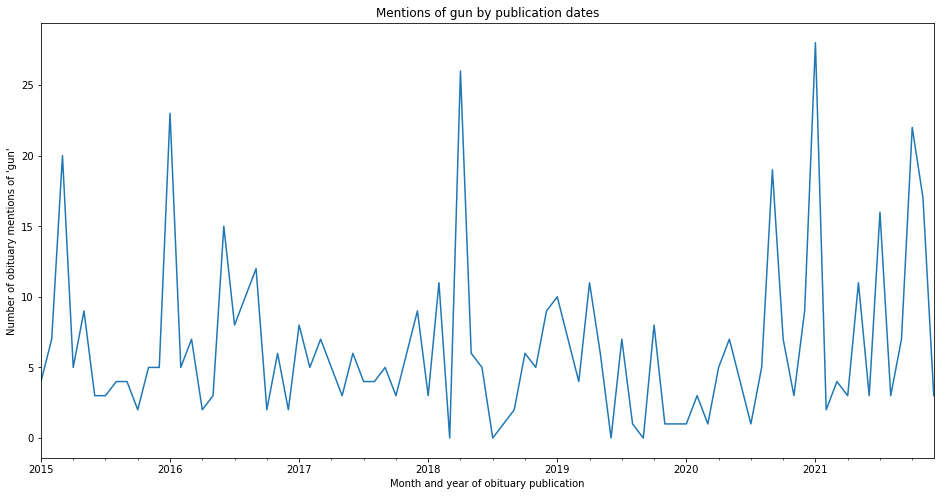

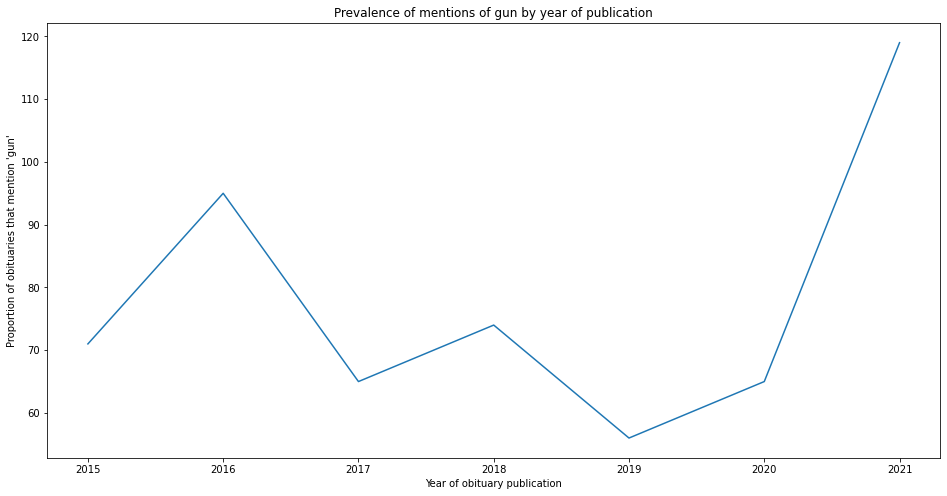

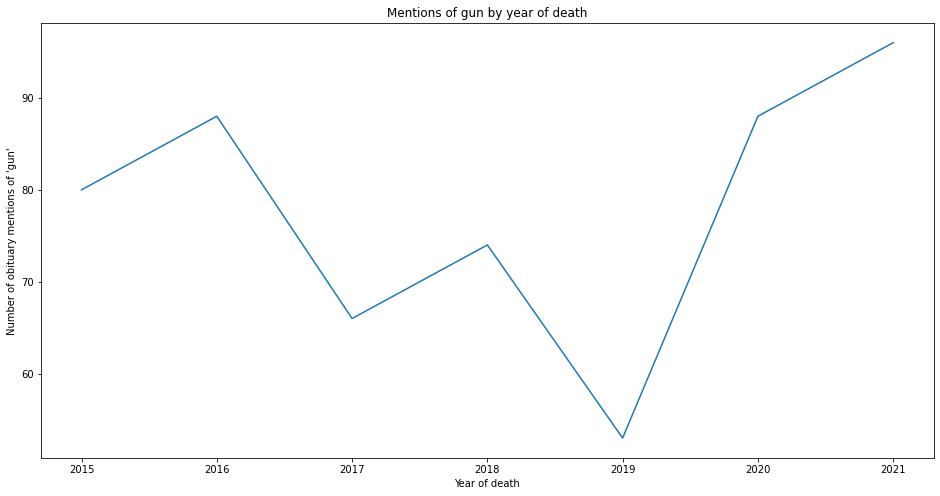

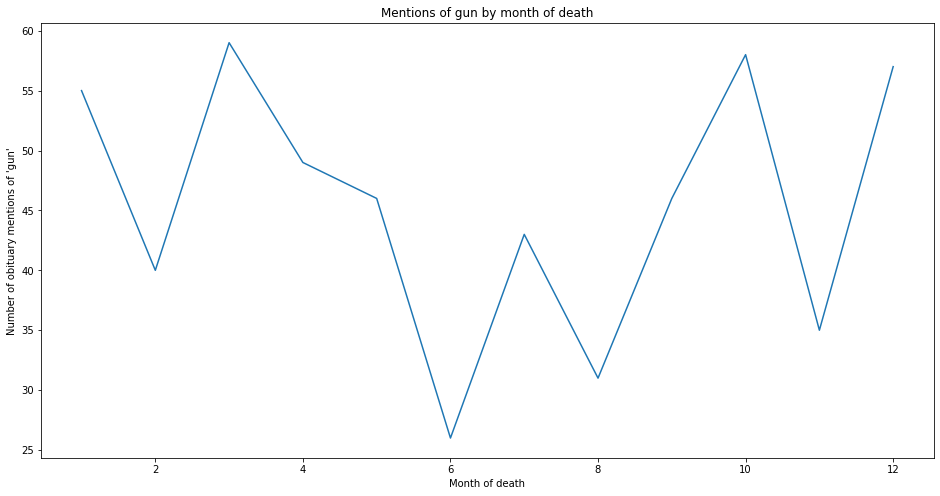

In [28]:
dcdf = get_counts(dcdf, 'gun')

Keywords: ['gun', 'guns', 'firearm', 'firearms', 'bullet', 'bullets', 'shot', 'stray', 'violent', 'violence']
Name of resulting columns: ('firearm_list_count', 'firearm_list_ratio')

Frequency of these word(s) in data:

count    31327.000000
mean         0.030102
std          0.325383
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         20.000000
Name: firearm_list_count, dtype: float64

Out of 31327 obituaries confirmed in DC:

586 mention a word in ['gun', 'guns', 'firearm', 'firearms', 'bullet', 'bullets', 'shot', 'stray', 'violent', 'violence']
These words appear a total of 943 times
For texts containing any of these words, on average they mention them 1.6092150170648465 times, and at most they mention them 20 times
Displaying 15 of 68 matches:
y Jr. in 1981 suing the assassin, the gun manufacturers and distributors of the
ntegrated fire control specialist and gun mechanic. In 1958, Steve moved to Bet
 enjoy donations in his honor to s

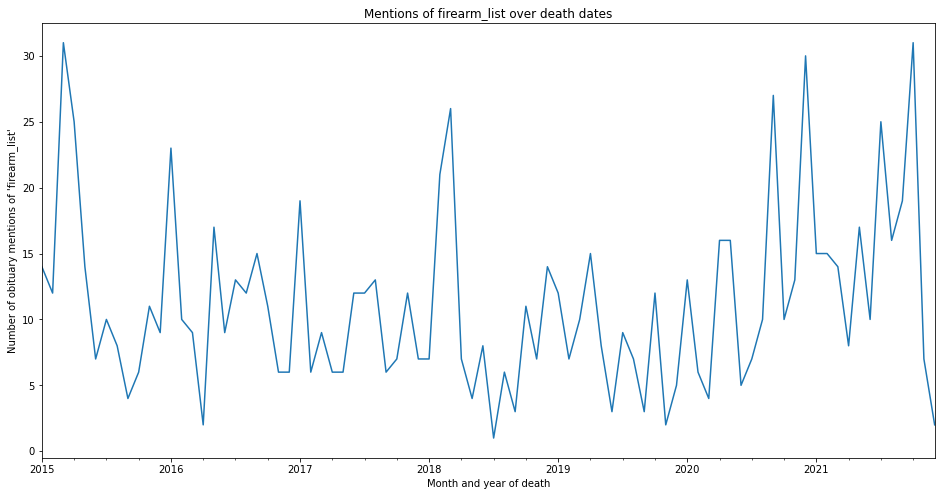

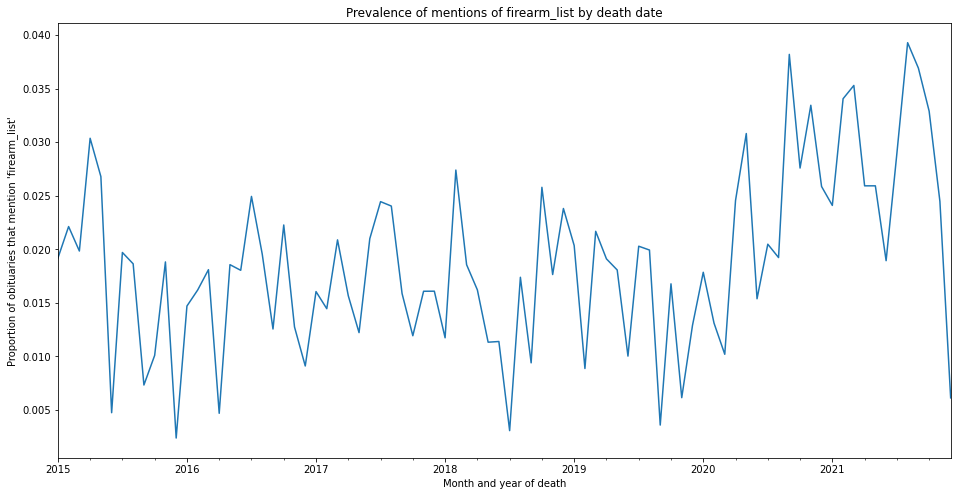

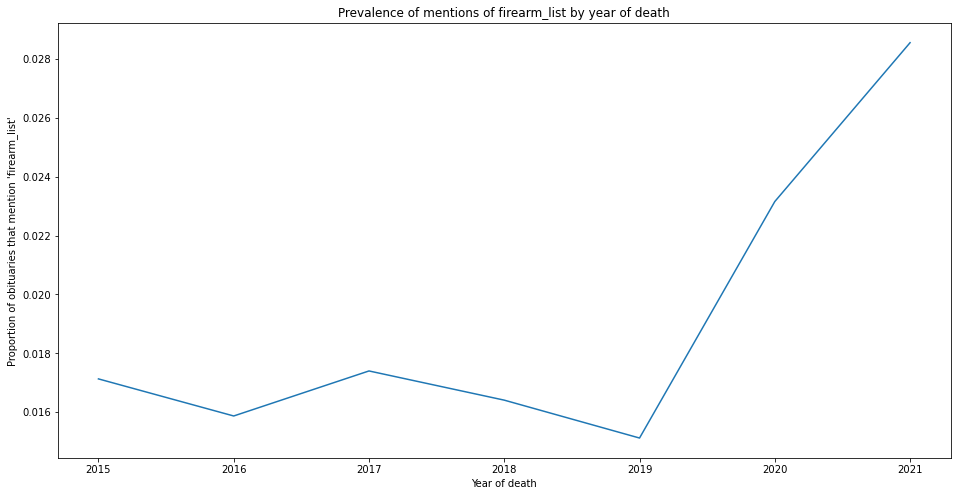

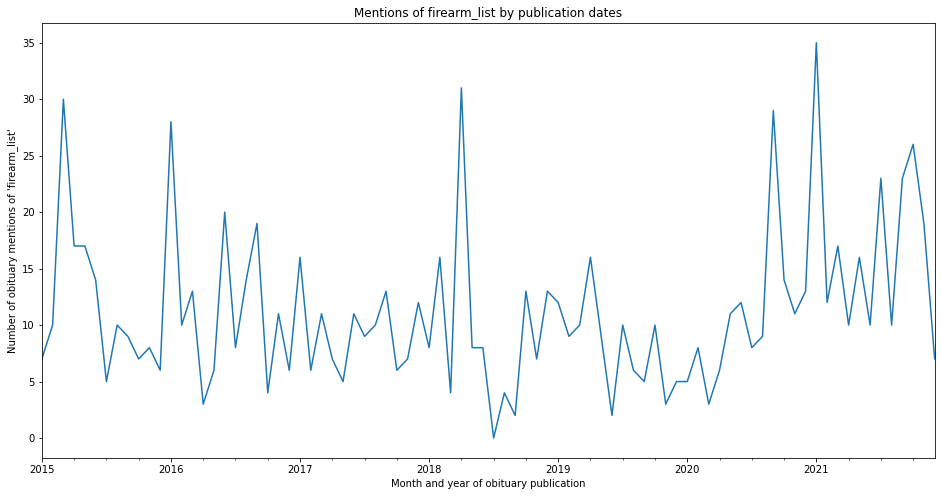

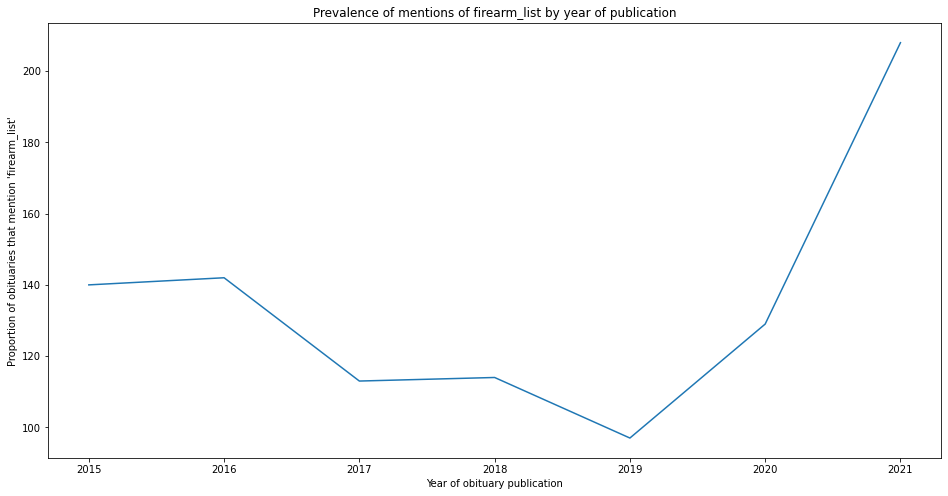

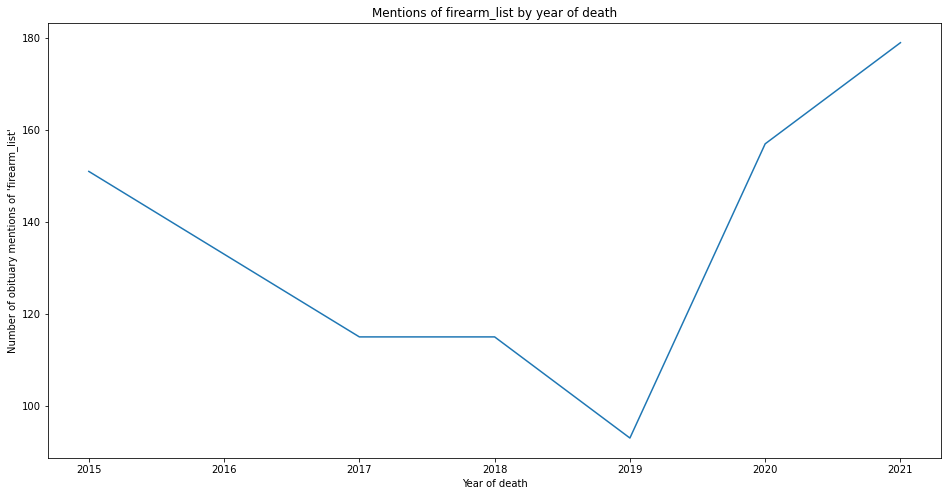

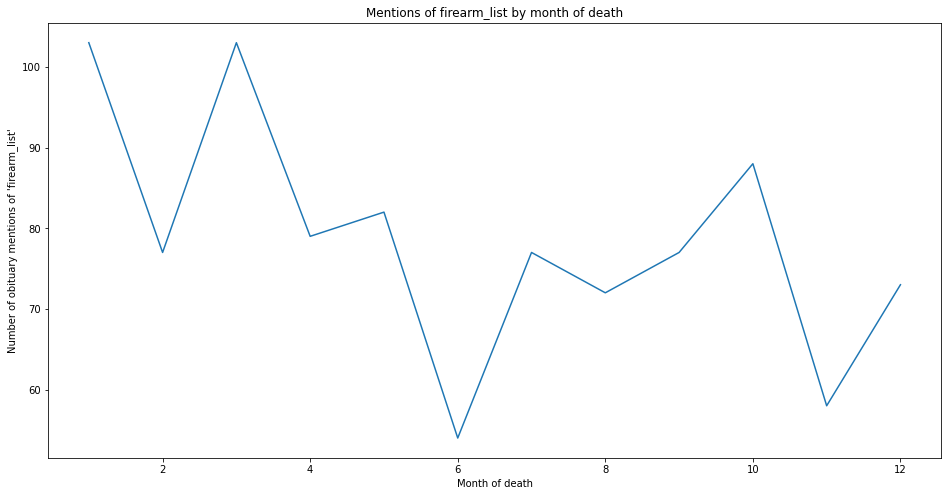

In [29]:
gun_words = ['gun', 'guns', 'firearm', 'firearms', 'bullet', 'bullets', 'shot', 'stray', 'violent', 'violence']

dcdf = get_counts(dcdf, keywords = gun_words, list_input=True, varname='firearm_list')

### Religious affiliation

#### Christian denominations

Keywords: ['christian', 'catholic', 'catholics', 'protestant', 'methodist', 'episcopal', 'episcopalian', 'lutheran', 'adventist', 'coptic', 'anglican', 'jehovahs', "jehovah's"]
Name of resulting columns: ('christian_list_count', 'christian_list_ratio')

Frequency of these word(s) in data:

count    31327.000000
mean         0.470329
std          0.970091
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         26.000000
Name: christian_list_count, dtype: float64

Out of 31327 obituaries confirmed in DC:

8776 mention a word in ['christian', 'catholic', 'catholics', 'protestant', 'methodist', 'episcopal', 'episcopalian', 'lutheran', 'adventist', 'coptic', 'anglican', 'jehovahs', "jehovah's"]
These words appear a total of 14734 times
For texts containing any of these words, on average they mention them 1.6788969917958068 times, and at most they mention them 26 times
Displaying 15 of 3415 matches:
 will take place at 3 p.m. Mass of Christian Buri

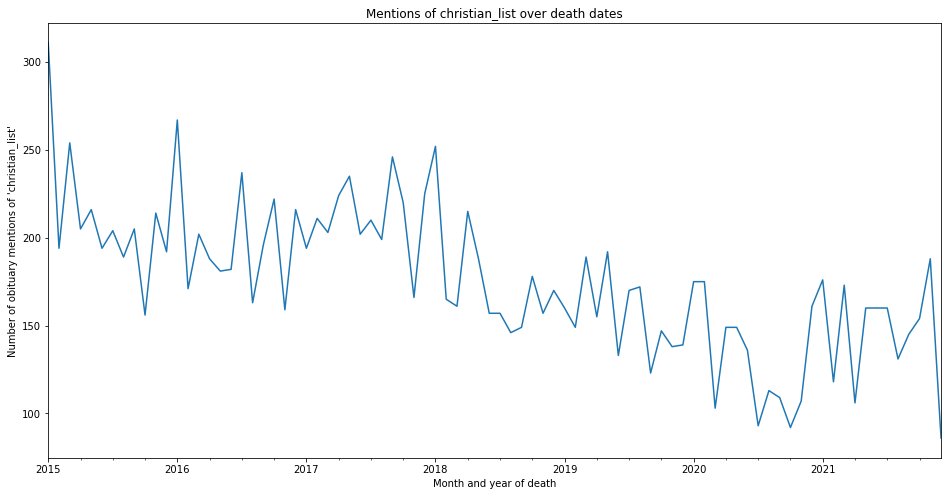

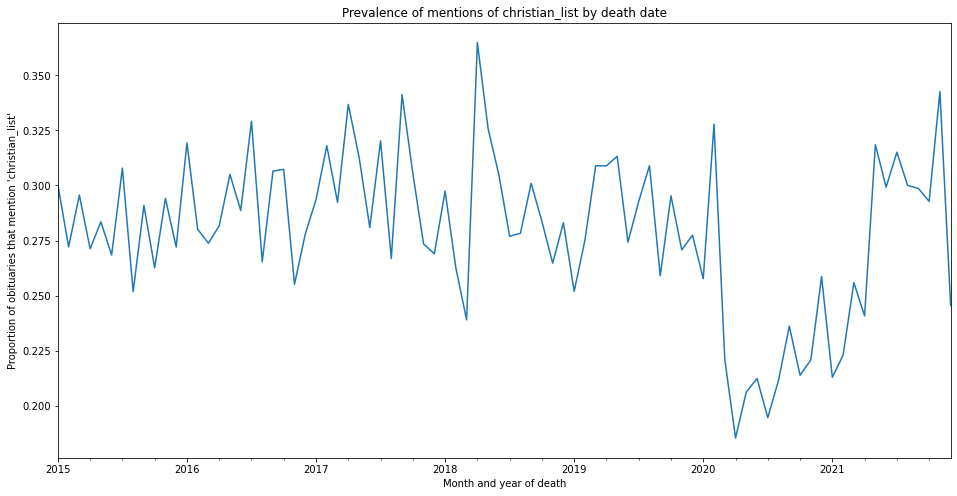

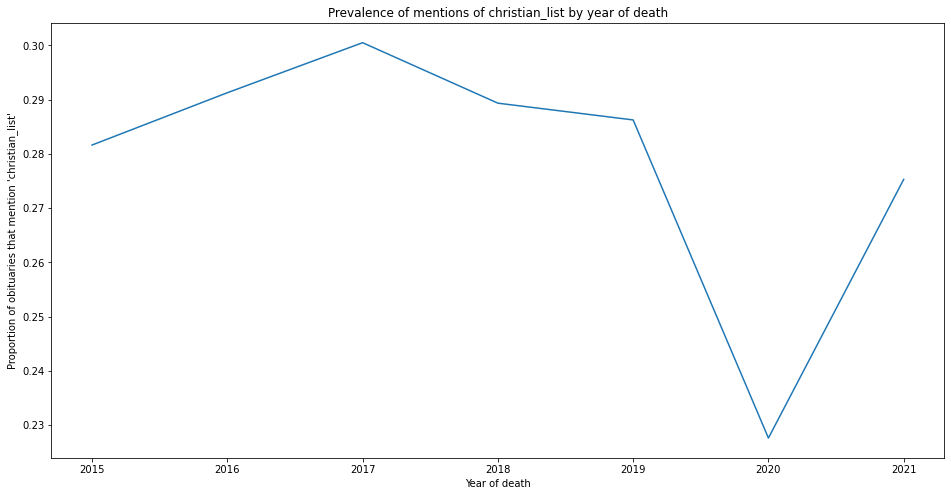

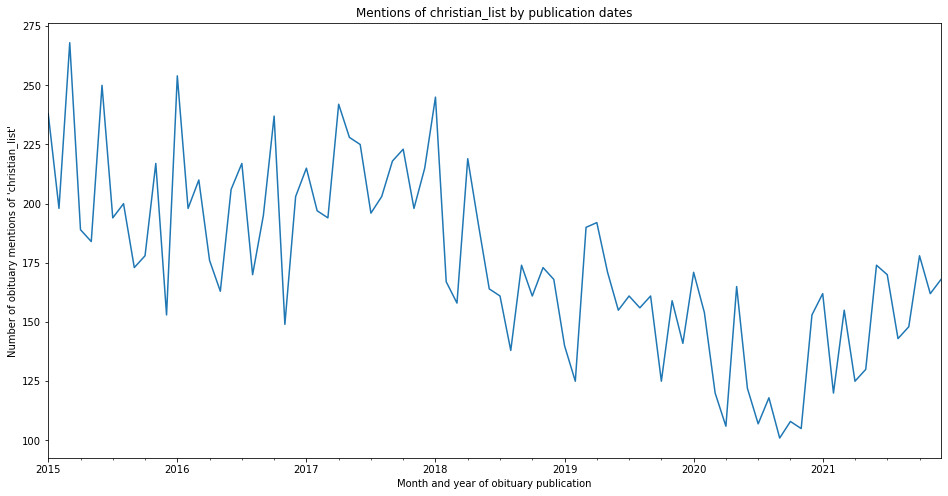

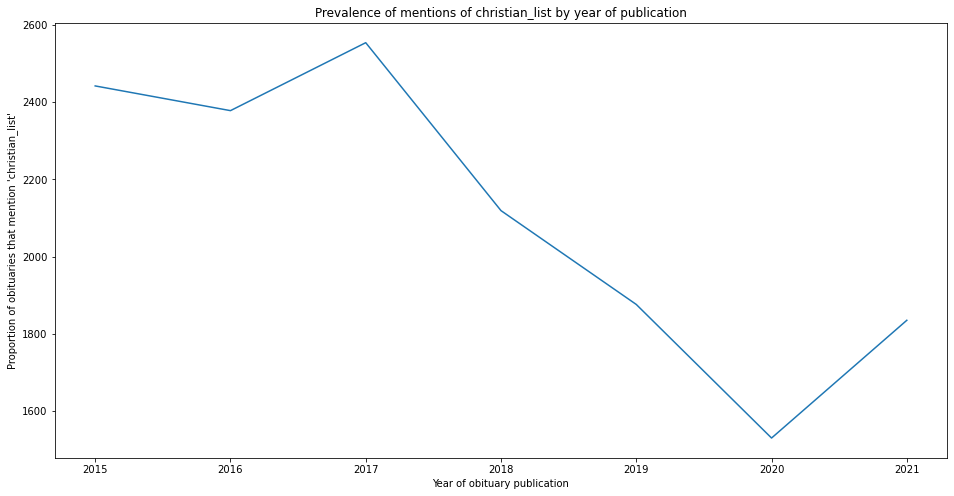

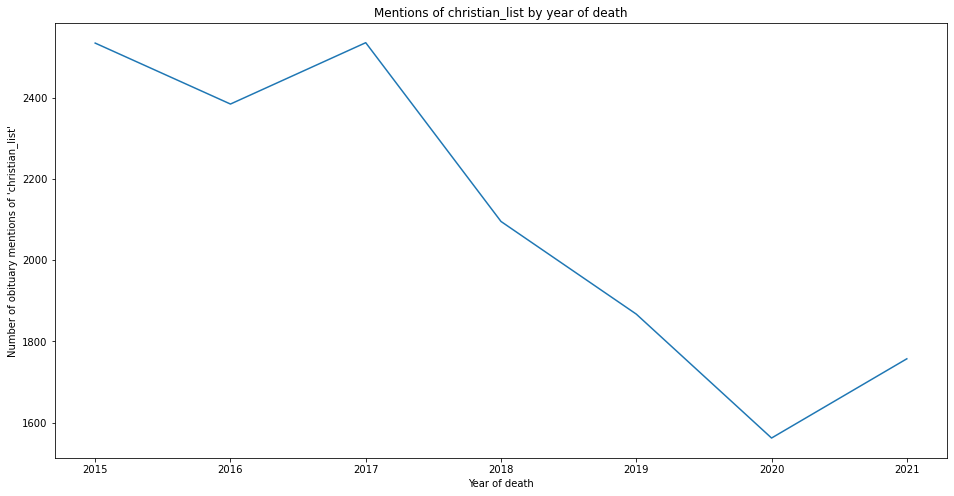

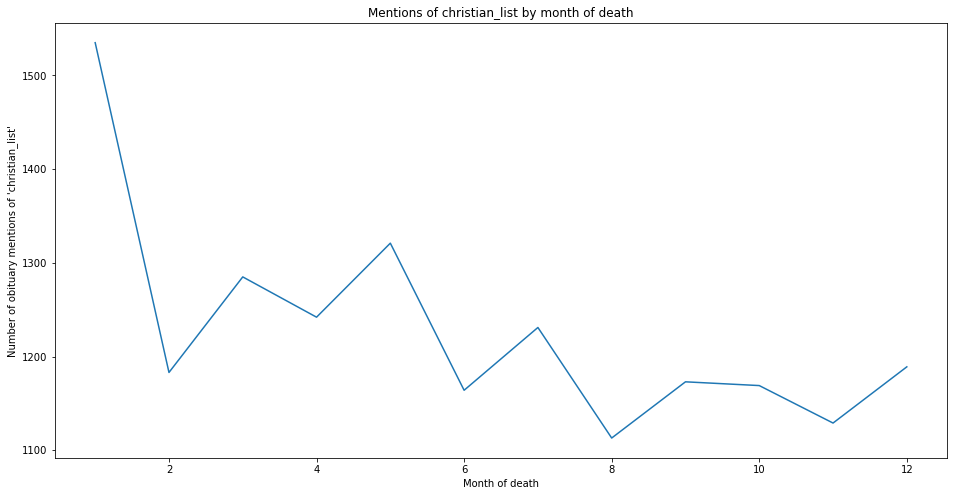

In [30]:
christian_words = ['christian', 'catholic', 'catholics', 'protestant', 'methodist', 'episcopal', 'episcopalian', 'lutheran', \
                   'adventist', 'coptic', 'anglican', 'jehovahs', "jehovah's"]

dcdf = get_counts(dcdf, keywords = christian_words, list_input=True, varname='christian_list')

Keywords: christian
Name of resulting columns: ('christian_count', 'christian_ratio')

Frequency of these word(s) in data:

count    31327.000000
mean         0.117279
std          0.388459
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         12.000000
Name: christian_count, dtype: float64

Out of 31327 obituaries confirmed in DC:
3278 mention 'christian'
'christian' appears a total of 3674 times
For texts containing 'christian', on average they mention it 1.1208053691275168 times.
Displaying 30 of 3415 matches:
 will take place at 3 p.m. Mass of Christian Burial on Monday April 4 at St. Jo
n to be a very giving and faithful Christian woman who enjoyed gatherings with 
from 10 a.m. until time of Mass of Christian Burial 11 a.m. at St. Francis de S
 30, 2017 from 6 to 8 p.m. Mass of Christian Burial will be offered at St. Raph
l Home, Springfield, VA. A Mass of Christian Burial will be celebrated on Thurs
yattsville, MD 20781 where Mass of 

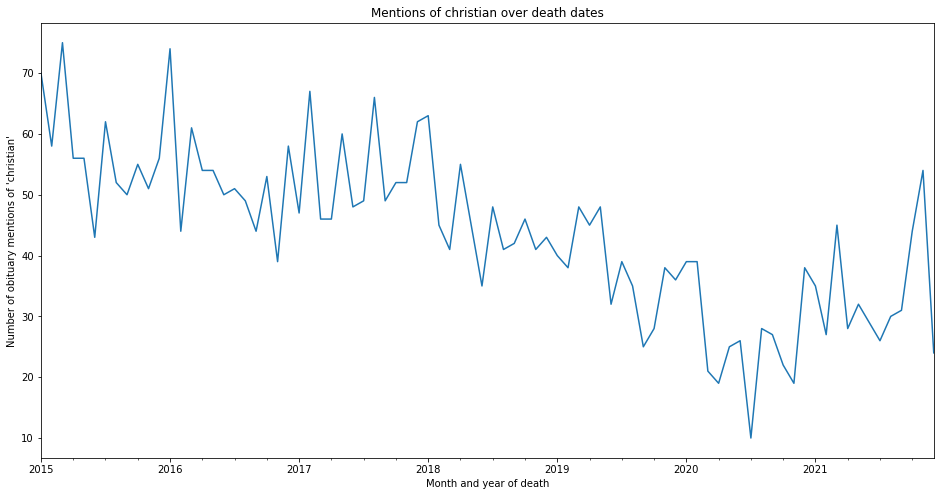

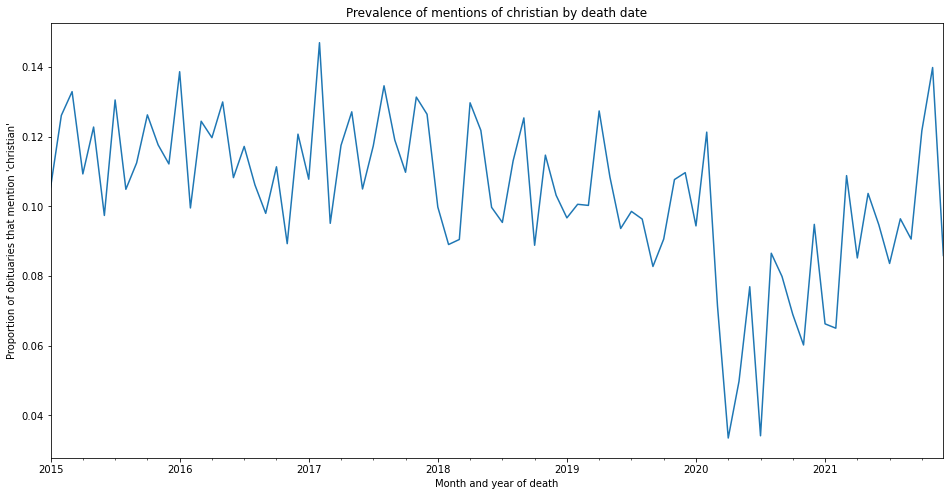

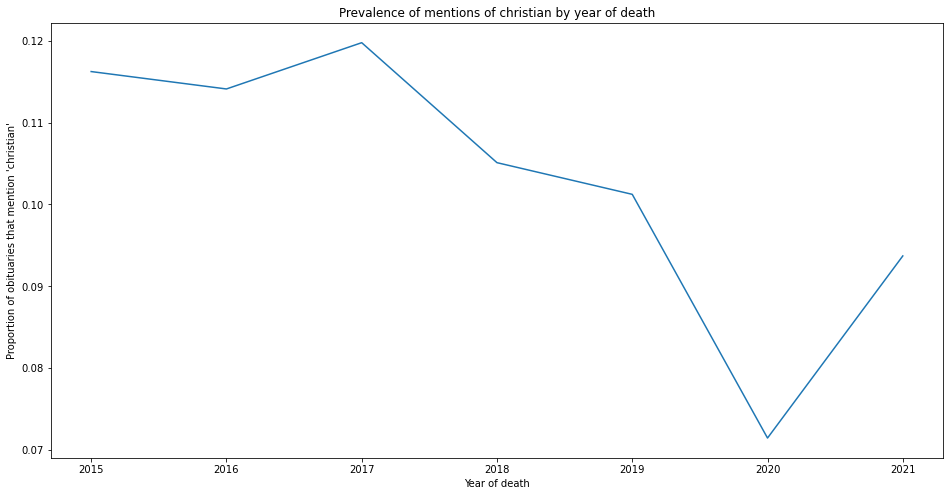

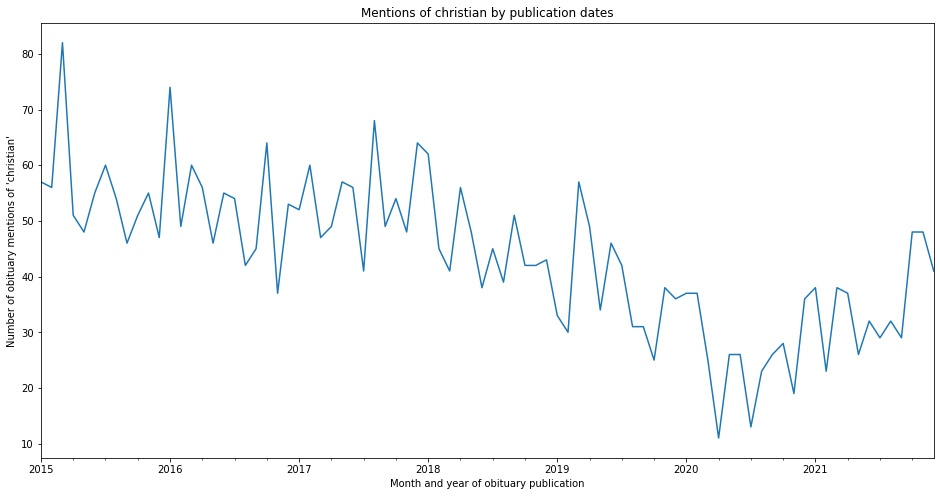

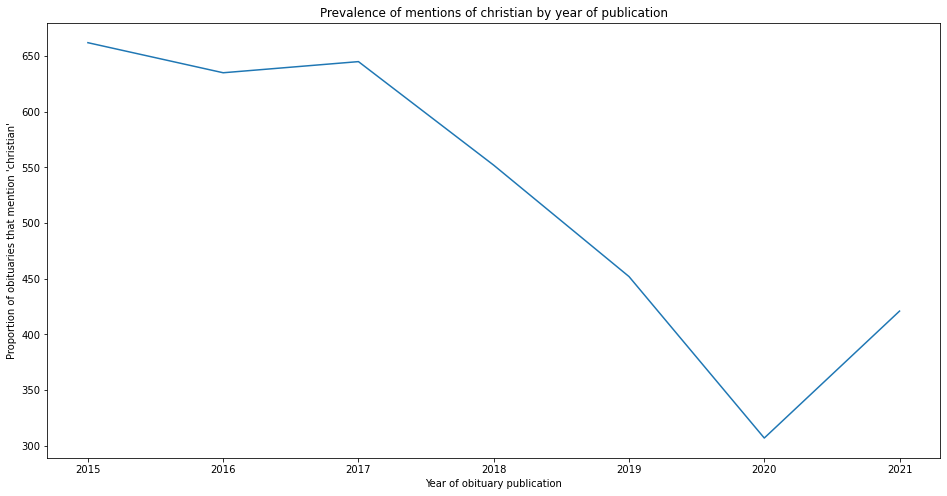

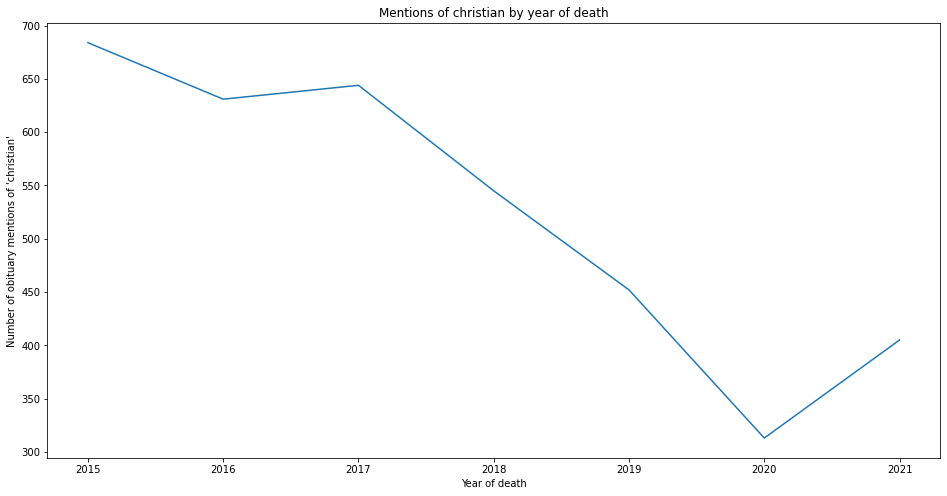

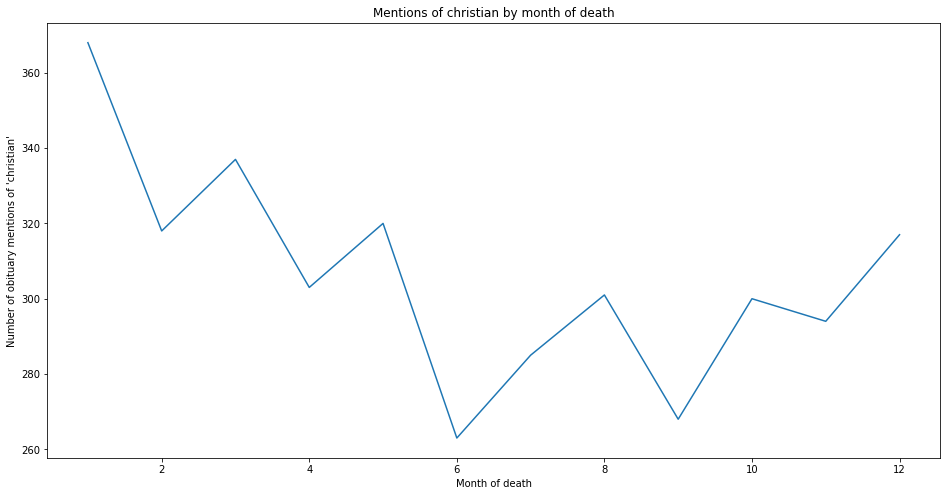

In [31]:
dcdf = get_counts(dcdf, keywords = 'christian')

Keywords: orthodox
Name of resulting columns: ('orthodox_count', 'orthodox_ratio')

Frequency of these word(s) in data:

count    31327.000000
mean         0.020940
std          0.231047
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          9.000000
Name: orthodox_count, dtype: float64

Out of 31327 obituaries confirmed in DC:
353 mention 'orthodox'
'orthodox' appears a total of 656 times
For texts containing 'orthodox', on average they mention it 1.858356940509915 times.
Displaying 30 of 649 matches:
l 4 from 10 a.m. to 11 a.m. at The Orthodox Church of St. Matthew, 7271 Eden B
hursday, April 4 at 11 a.m. at The Orthodox Church of St. Matthew, 7271 Eden B
l 4 from 10 a.m. to 11 a.m. at The Orthodox Church of St. Matthew, 7271 Eden B
hursday, April 4 at 11 a.m. at The Orthodox Church of St. Matthew, 7271 Eden B
to 11 a.m. at the St. Luke Serbian Orthodox Church, 10660 River Road, Potomac,
eive friends at Saint Sophia Greek Orthodox Cathedr

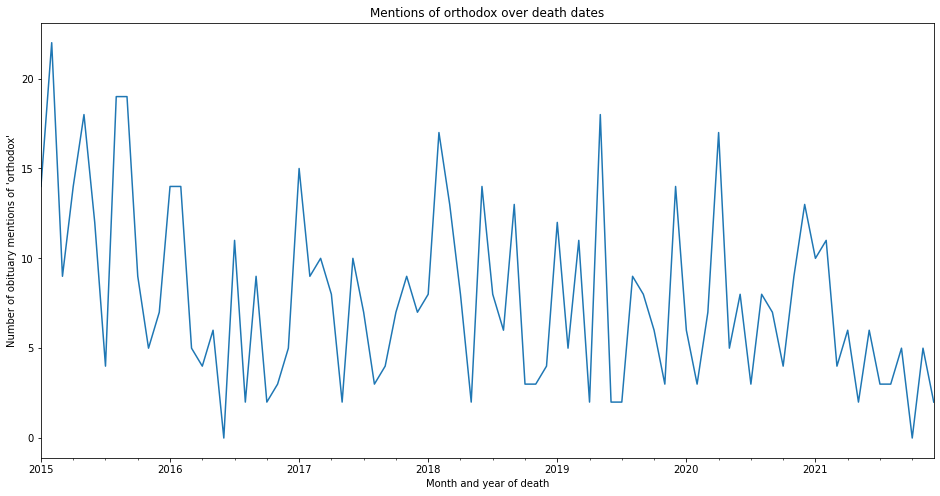

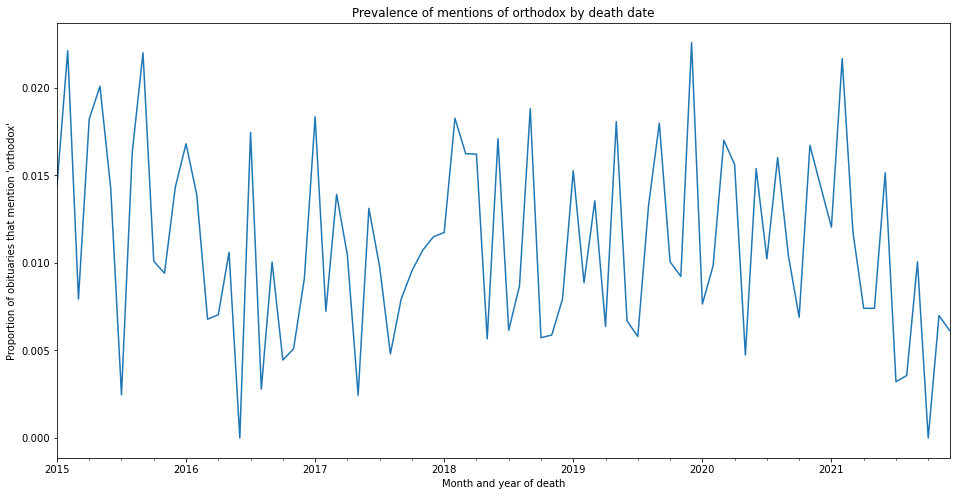

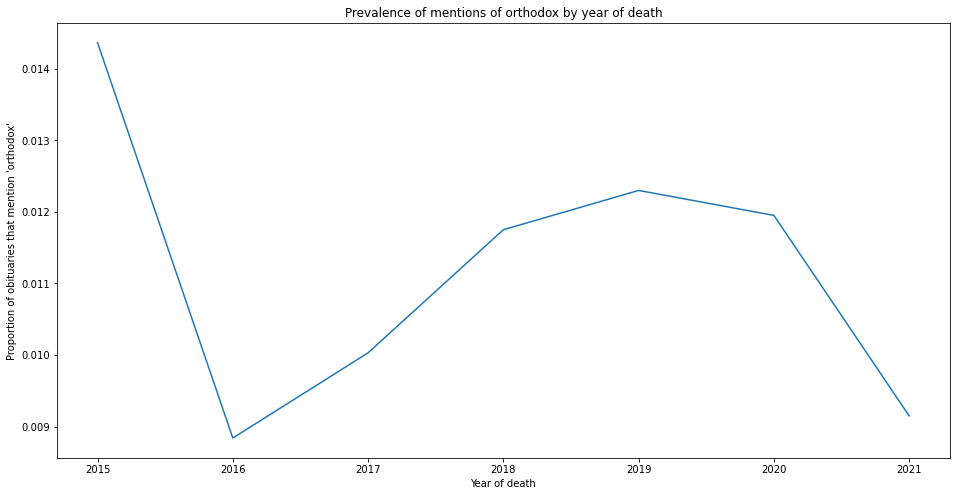

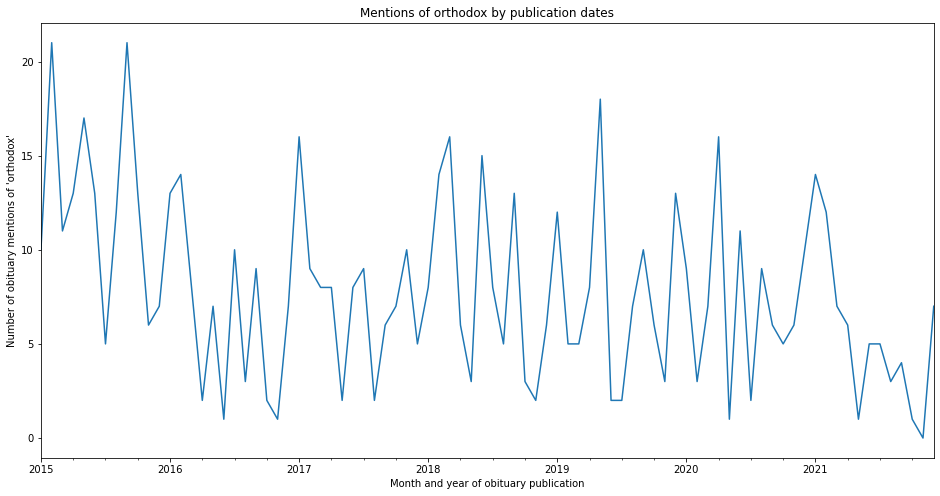

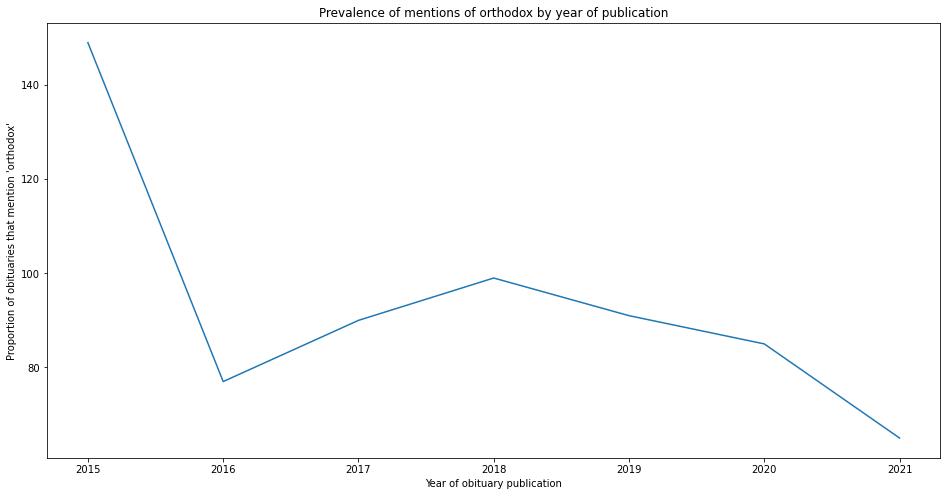

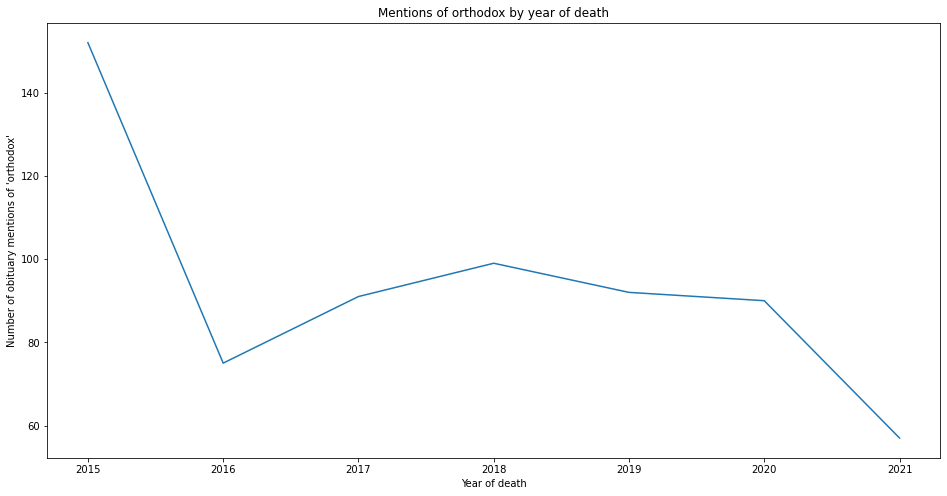

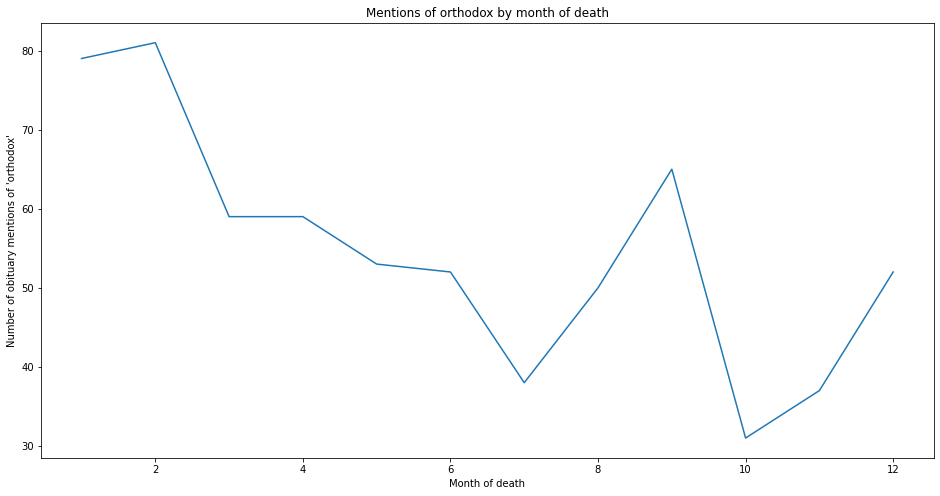

In [32]:
dcdf = get_counts(dcdf, keywords = 'orthodox')

Keywords: ['catholic', 'catholics']
Name of resulting columns: ('catholic_list_count', 'catholic_list_ratio')

Frequency of these word(s) in data:

count    31327.000000
mean         0.191528
std          0.591412
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         17.000000
Name: catholic_list_count, dtype: float64

Out of 31327 obituaries confirmed in DC:

4196 mention a word in ['catholic', 'catholics']
These words appear a total of 6000 times
For texts containing any of these words, on average they mention them 1.4299332697807436 times, and at most they mention them 17 times
Displaying 15 of 5761 matches:
al 11 a.m. at St. Francis de Sales Catholic Church, 2015 Rhode Island Ave., NE
her of Hope Parish and St. Brendan Catholic Church in Cleveland, OH. Pauline w
ial will be offered at St. Raphael Catholic Church, 1513 Dunster Road, Rockvil
:30 a.m. at St. Philip the Apostle Catholic Church, Falls Church. Interment wi
l 5, at 10:30 a.m. 

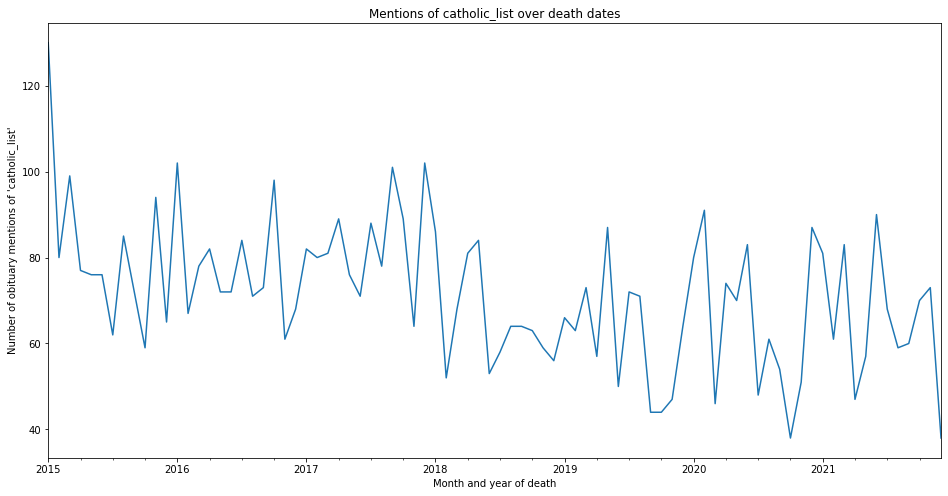

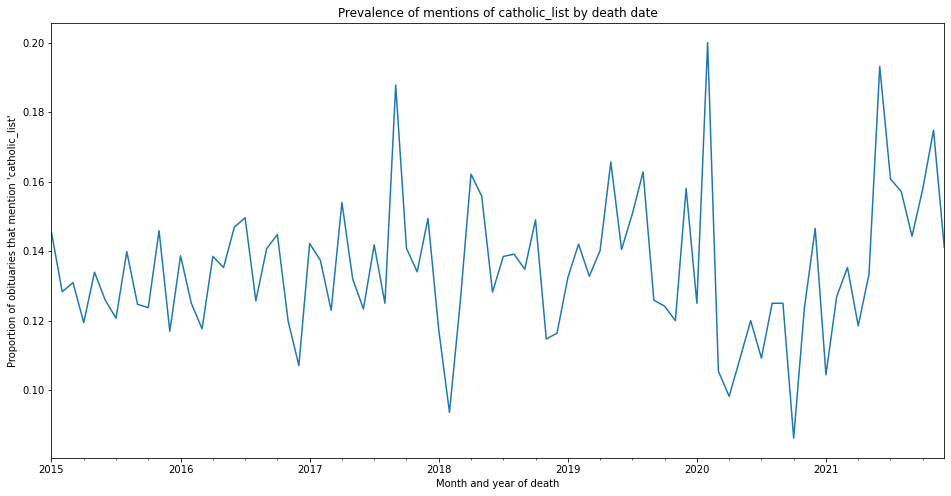

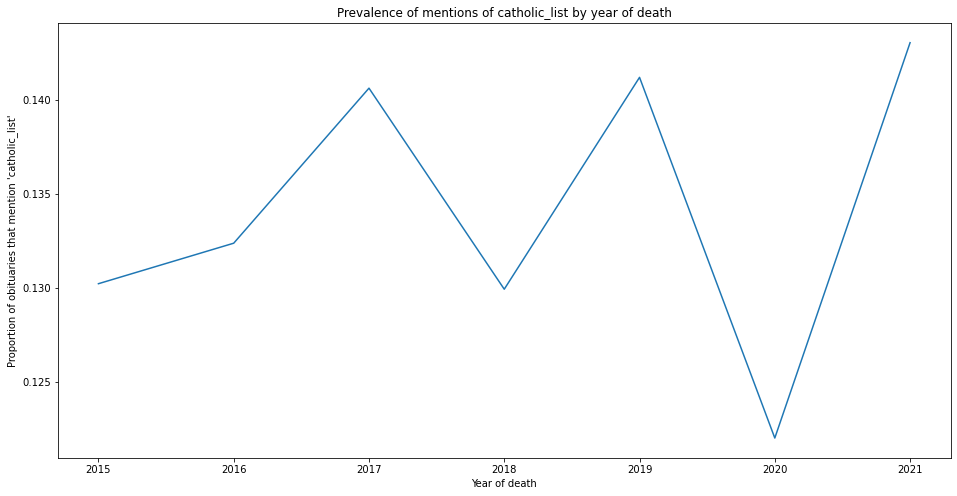

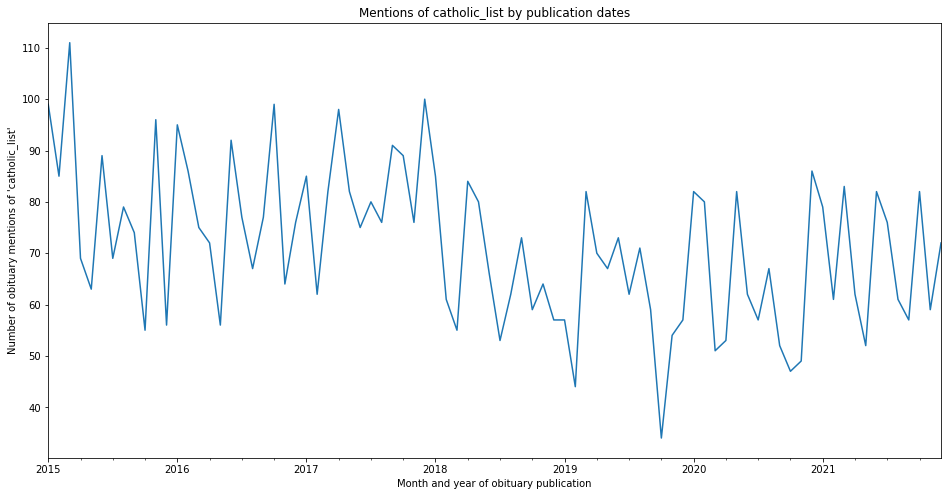

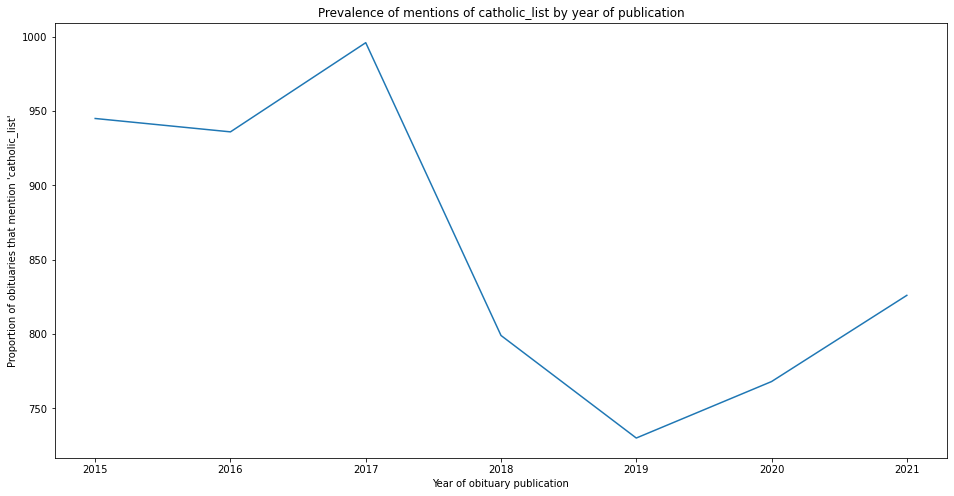

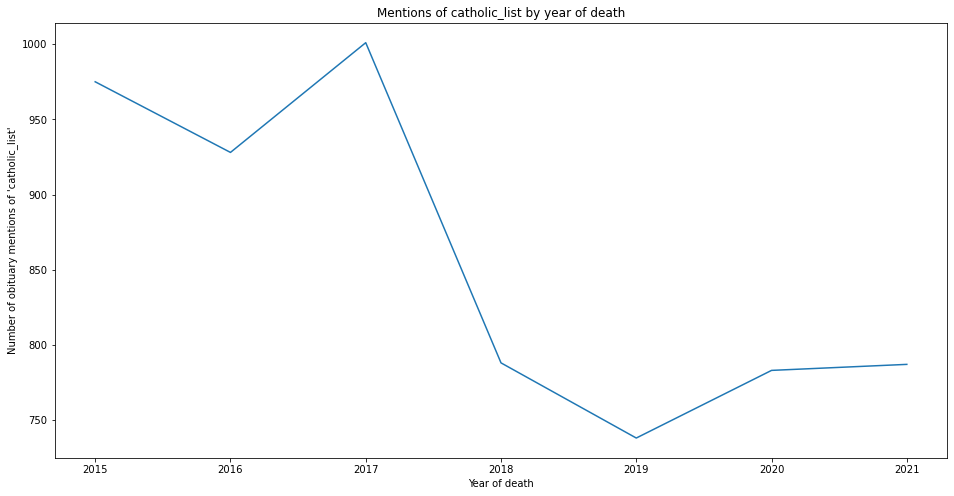

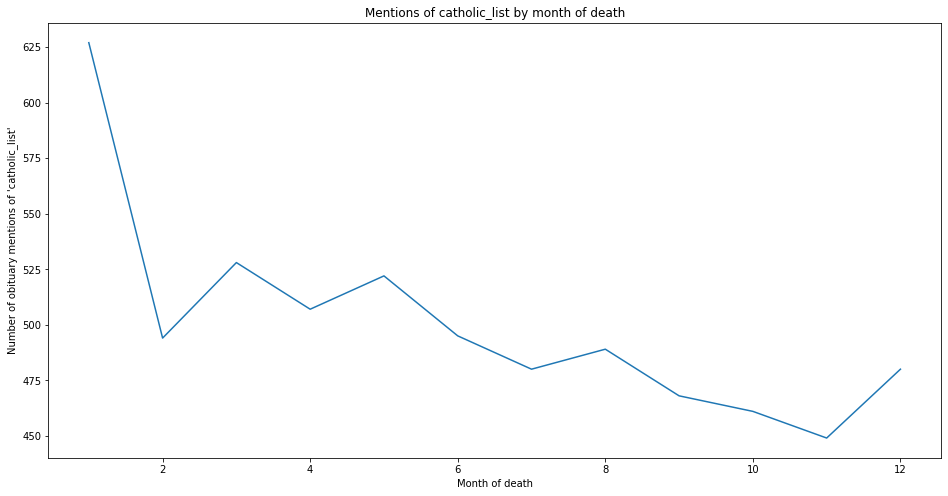

In [33]:
dcdf = get_counts(dcdf, keywords = ['catholic', 'catholics'], list_input=True, varname='catholic_list')

Keywords: ['protestant', 'methodist', 'episcopal', 'episcopalian', 'lutheran']
Name of resulting columns: ('other_christian_list_count', 'other_christian_list_ratio')

Frequency of these word(s) in data:

count    31327.000000
mean         0.152807
std          0.575676
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         19.000000
Name: other_christian_list_count, dtype: float64

Out of 31327 obituaries confirmed in DC:

3081 mention a word in ['protestant', 'methodist', 'episcopal', 'episcopalian', 'lutheran']
These words appear a total of 4787 times
For texts containing any of these words, on average they mention them 1.5537163258682245 times, and at most they mention them 19 times
Displaying 15 of 19 matches:
ay, April 4, 2016, at The Village Protestant Church at Riderwood Village, 3110
um as well as several Islamic and Protestant denominational gatherings. Jeanne
d his Doctor of Ministry from the Protestant Episcopal Theological Semin

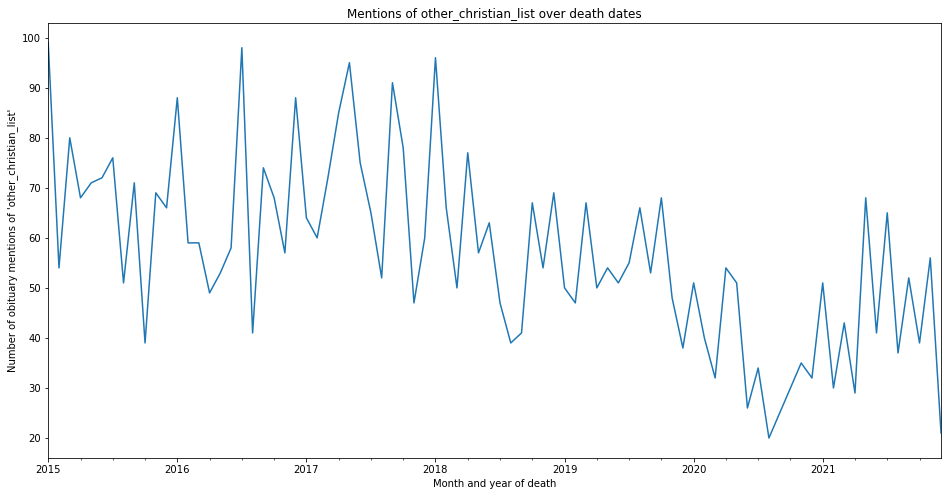

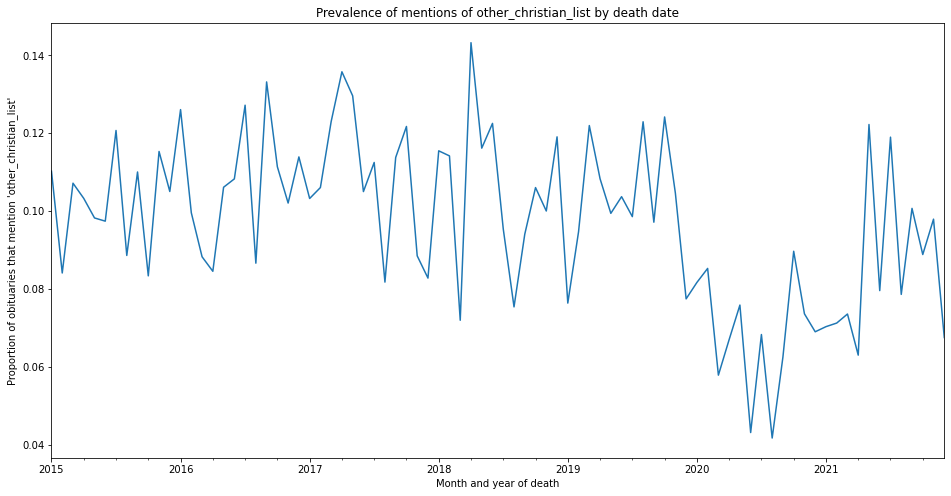

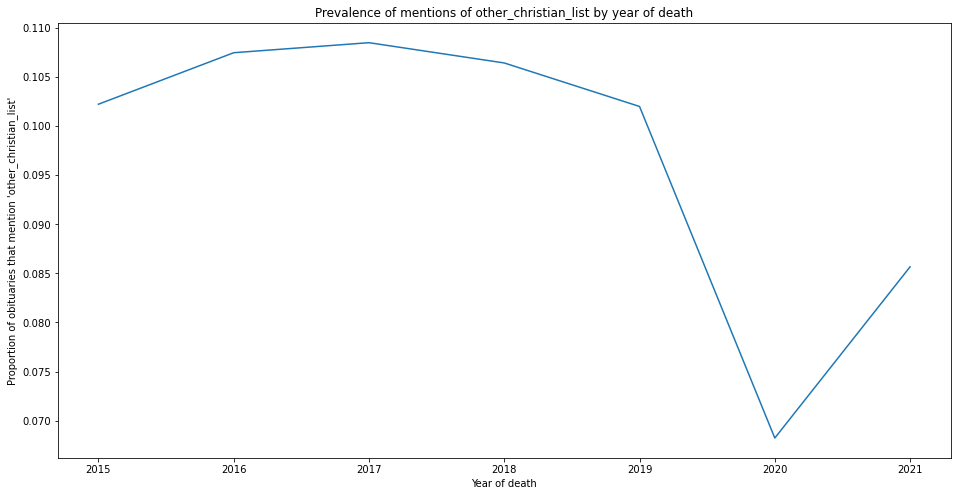

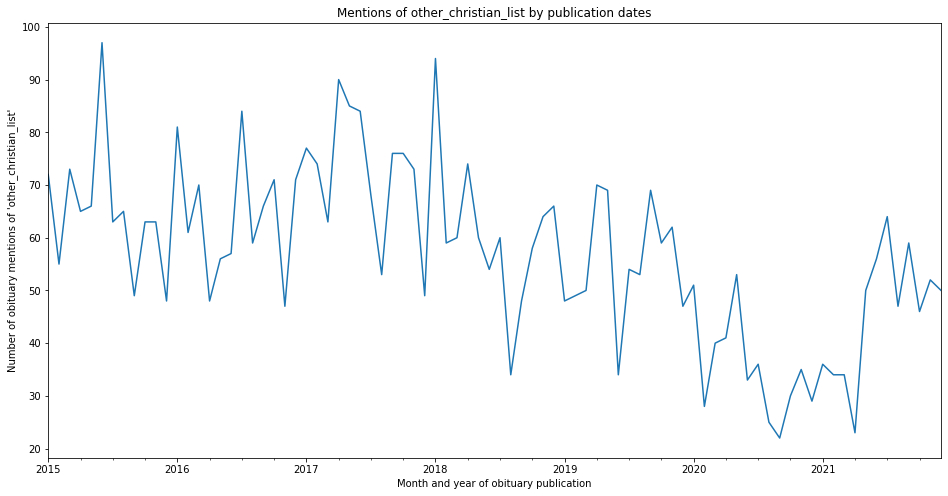

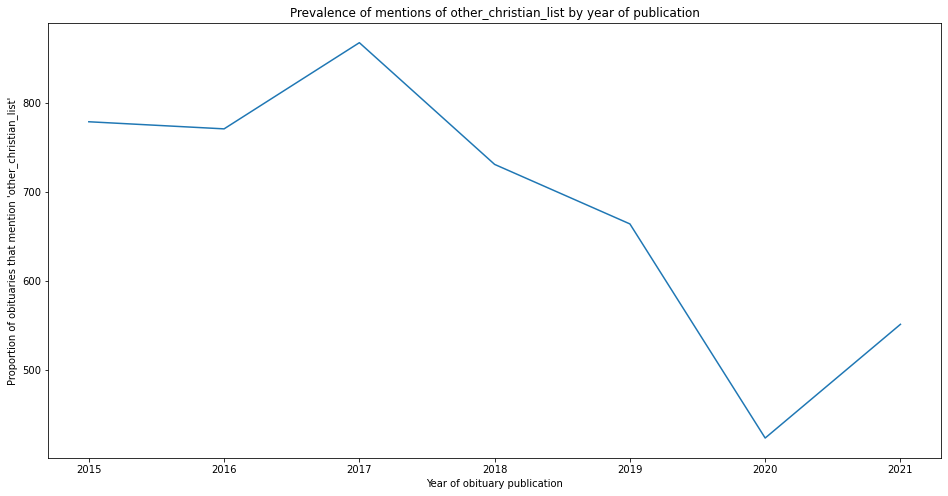

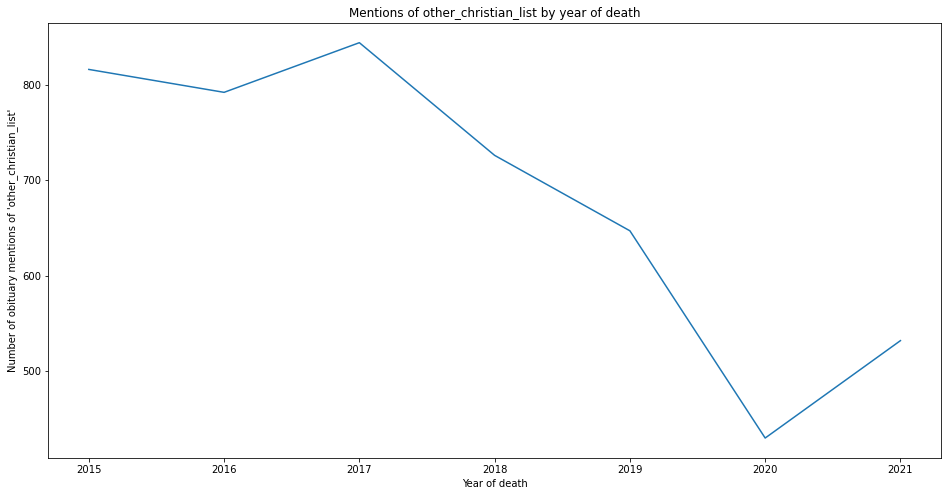

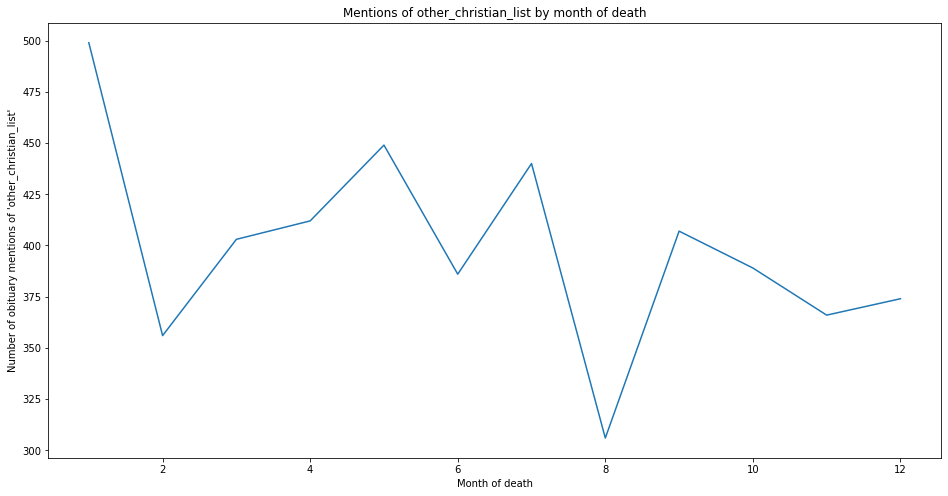

In [34]:
dcdf = get_counts(dcdf, keywords = ['protestant', 'methodist', 'episcopal', 'episcopalian', 'lutheran'], list_input=True, varname='other_christian_list')

#### Muslims

Keywords: ['islam', 'islamic', 'mosque', 'muslim', 'moslem', 'moslim']
Name of resulting columns: ('muslim_list_count', 'muslim_list_ratio')

Frequency of these word(s) in data:

count    31327.000000
mean         0.002618
std          0.115761
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         16.000000
Name: muslim_list_count, dtype: float64

Out of 31327 obituaries confirmed in DC:

37 mention a word in ['islam', 'islamic', 'mosque', 'muslim', 'moslem', 'moslim']
These words appear a total of 82 times
For texts containing any of these words, on average they mention them 2.2162162162162162 times, and at most they mention them 16 times
Displaying 1 of 1 matches:
ve address or Muhammad University of Islam (MUI), 3160 Pennsylvania Ave., SE, W
Displaying 15 of 24 matches:
V\AIDS symposium as well as several Islamic and Protestant denominational gathe
 ceremony, along with recitation of Islamic prayers, will be held at PUMPHREY'S
ohamad Sai

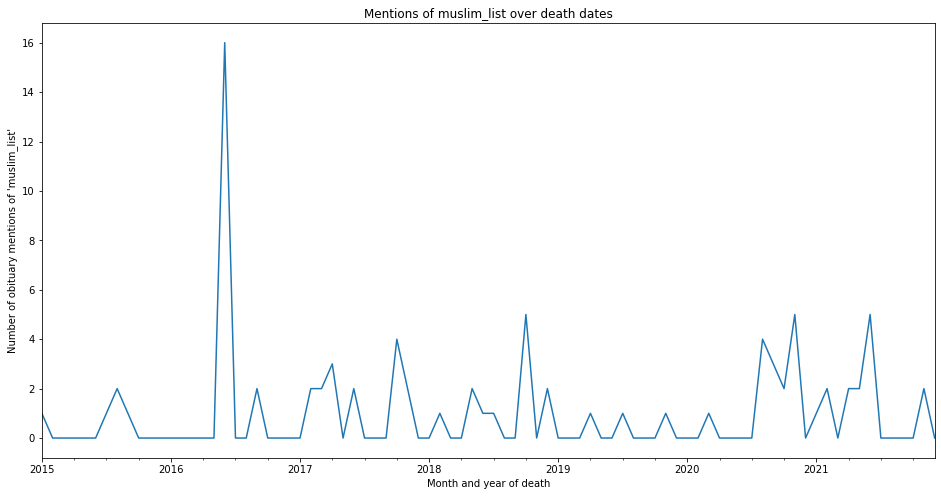

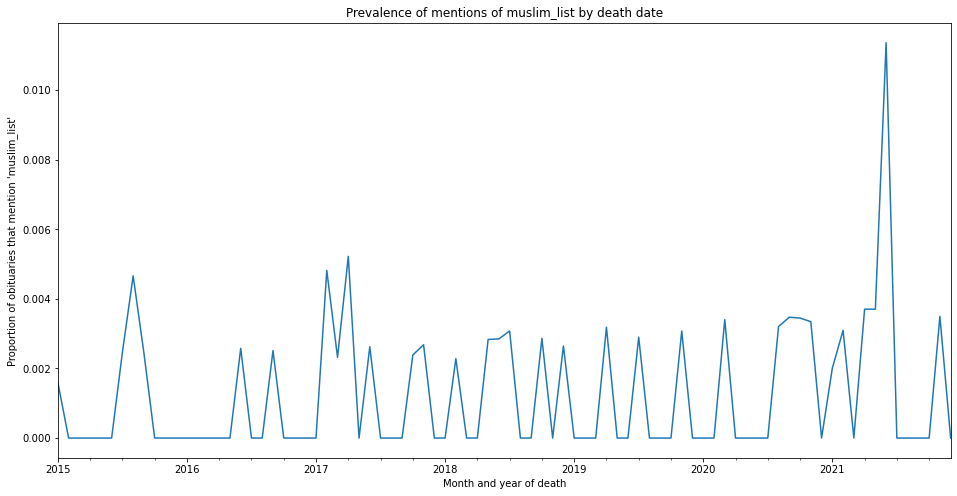

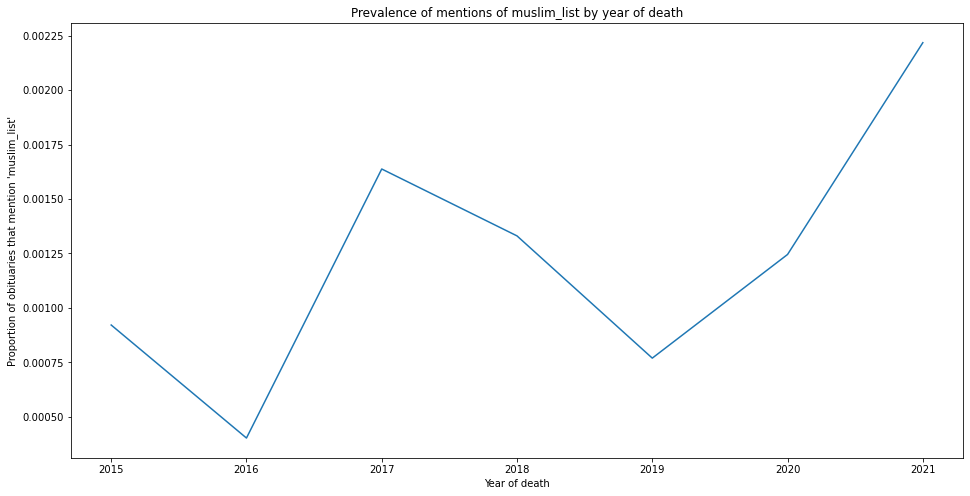

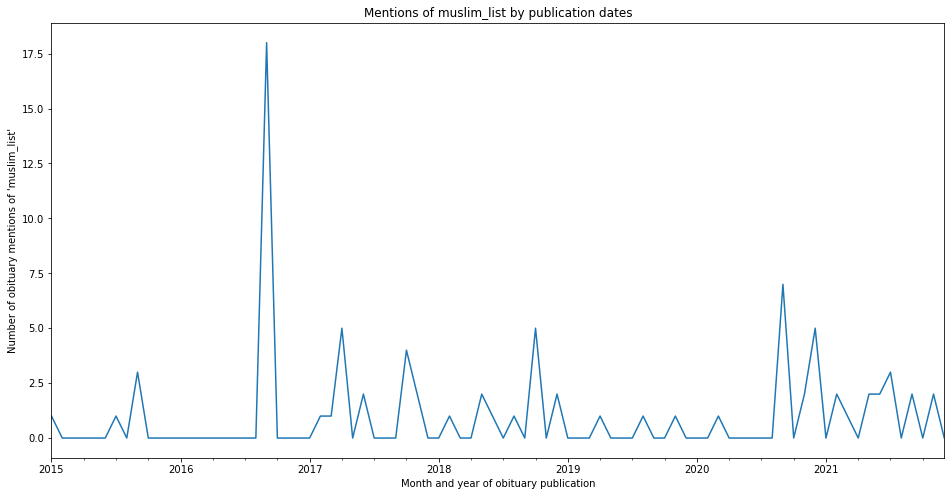

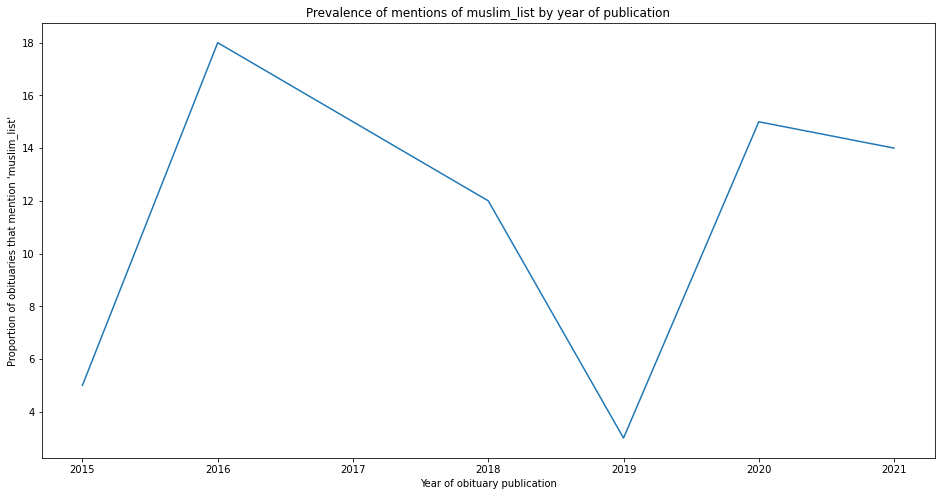

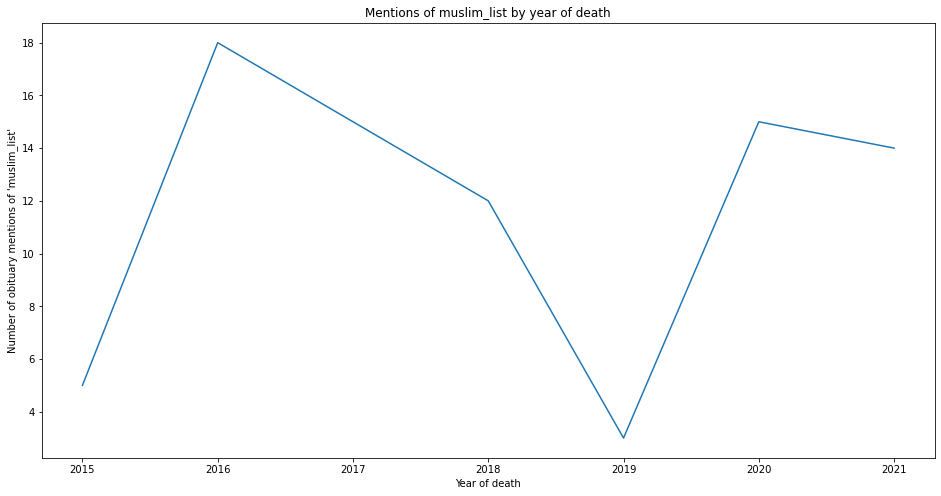

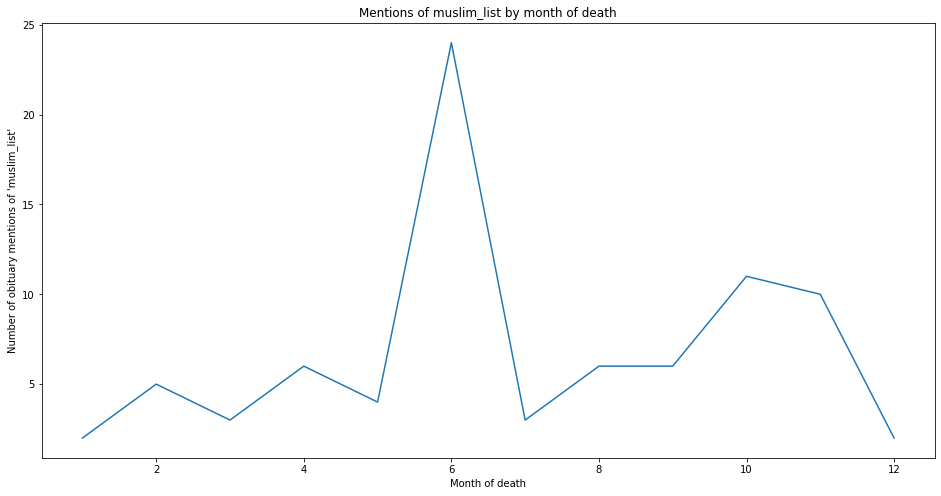

In [35]:
muslim_words = ['islam', 'islamic', 'mosque', 'muslim', 'moslem', 'moslim']

dcdf = get_counts(dcdf, keywords = muslim_words, list_input=True, varname='muslim_list')

#### Jewish

Keywords: ['jew', 'jewish', 'shiva']
Name of resulting columns: ('jewish_list_count', 'jewish_list_ratio')

Frequency of these word(s) in data:

count    31327.000000
mean         0.097009
std          0.560921
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         22.000000
Name: jewish_list_count, dtype: float64

Out of 31327 obituaries confirmed in DC:

1540 mention a word in ['jew', 'jewish', 'shiva']
These words appear a total of 3039 times
For texts containing any of these words, on average they mention them 1.9733766233766235 times, and at most they mention them 22 times
Displaying 2 of 2 matches:
a son of the late Evelyn King Yee and Jew Yam Yee. Alfred retired from the Nati
and married Marianne Schwarz, a Dutch Jew who had survived the Holocaust in Swi
Displaying 15 of 840 matches:
 However because of her status as a Jewish refugee, woman and foreigner, all b
 Adas Israel Congregation or to the Jewish Social Service Agency.FRANCINE 

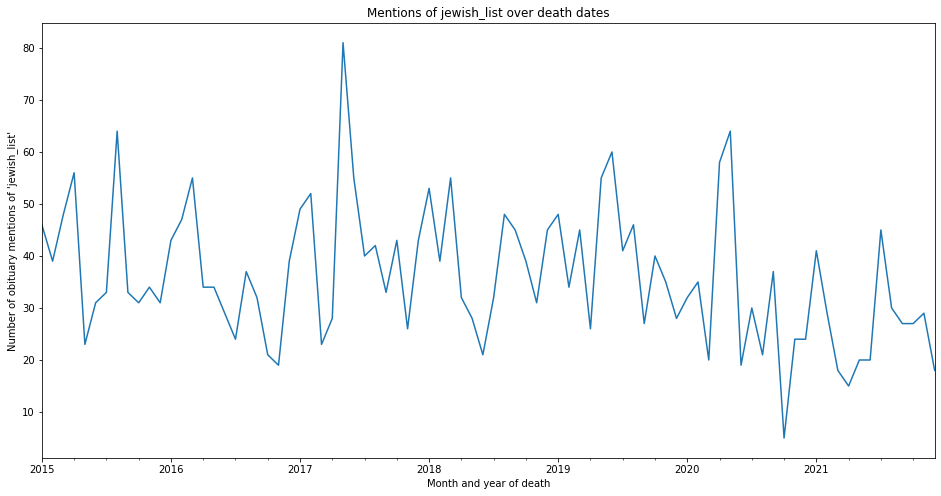

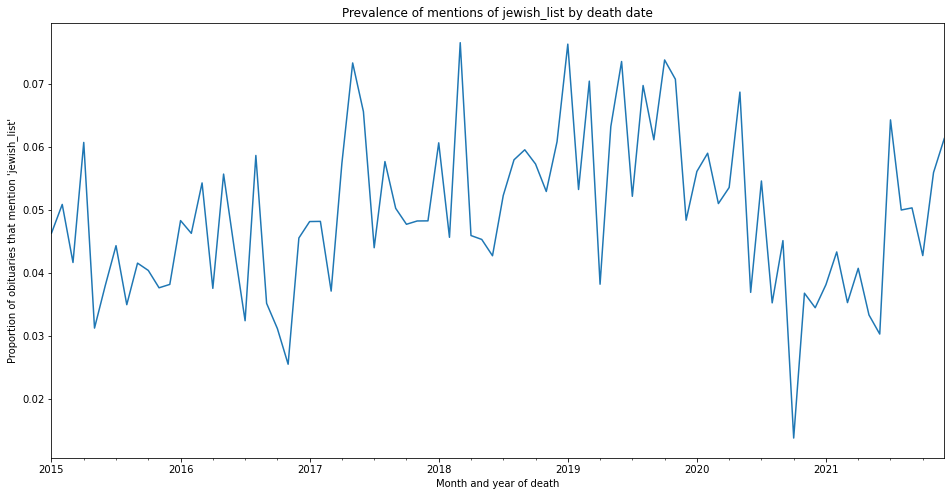

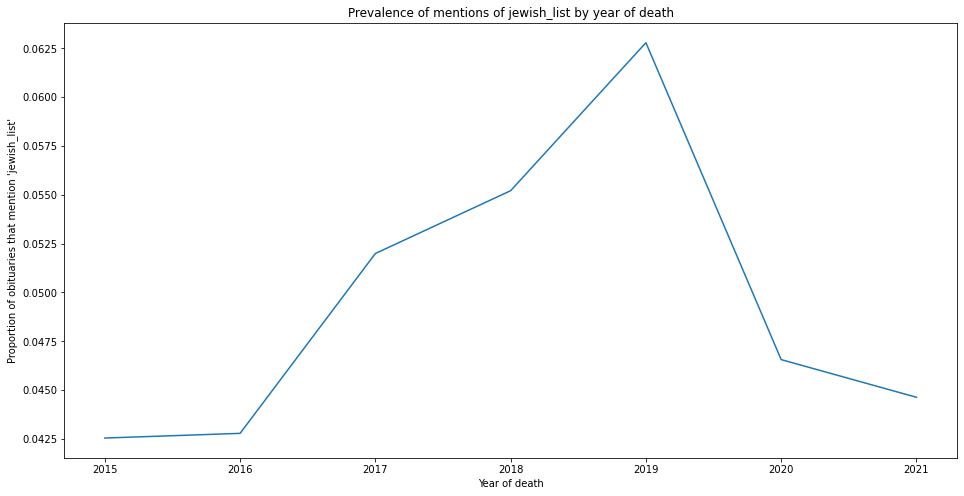

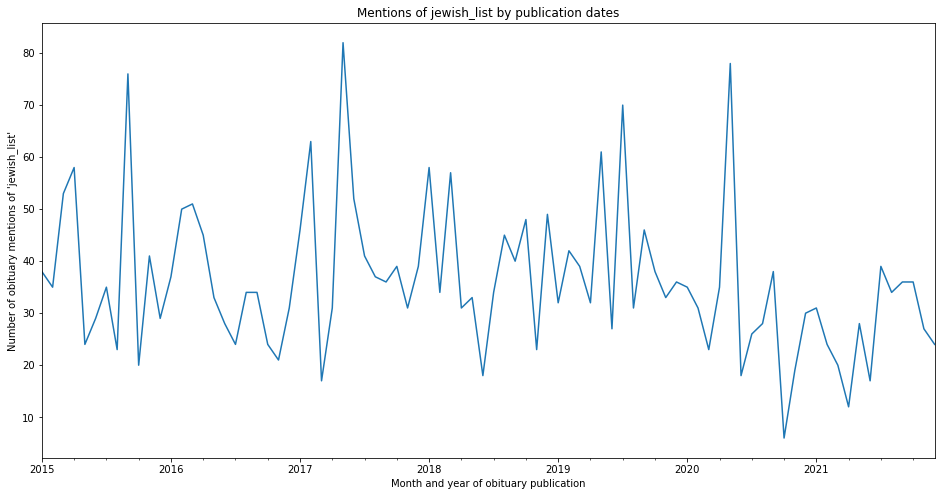

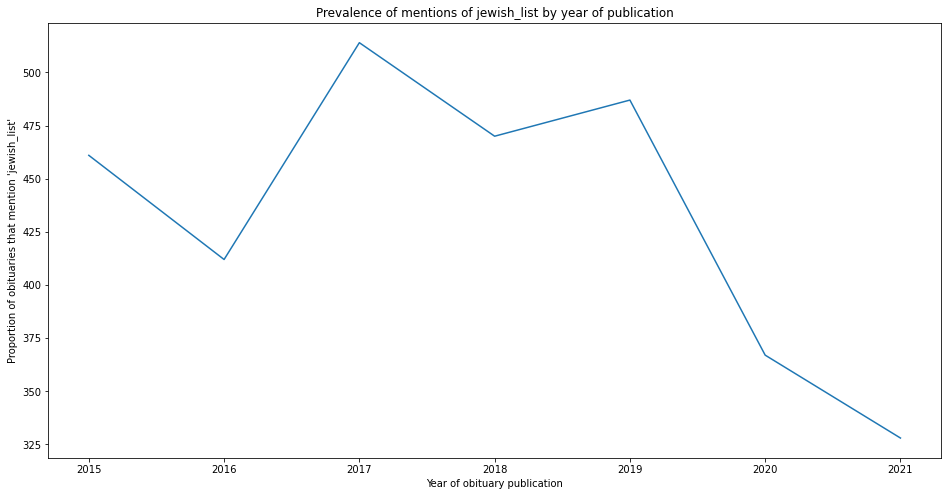

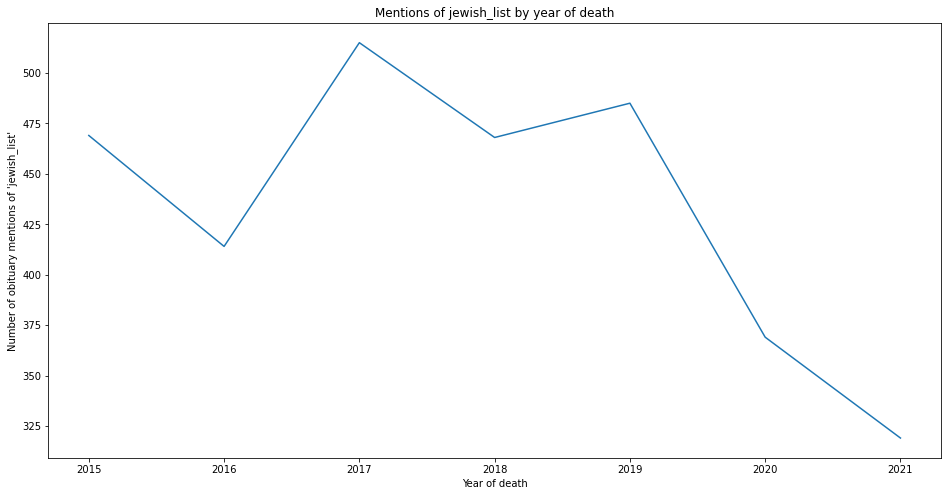

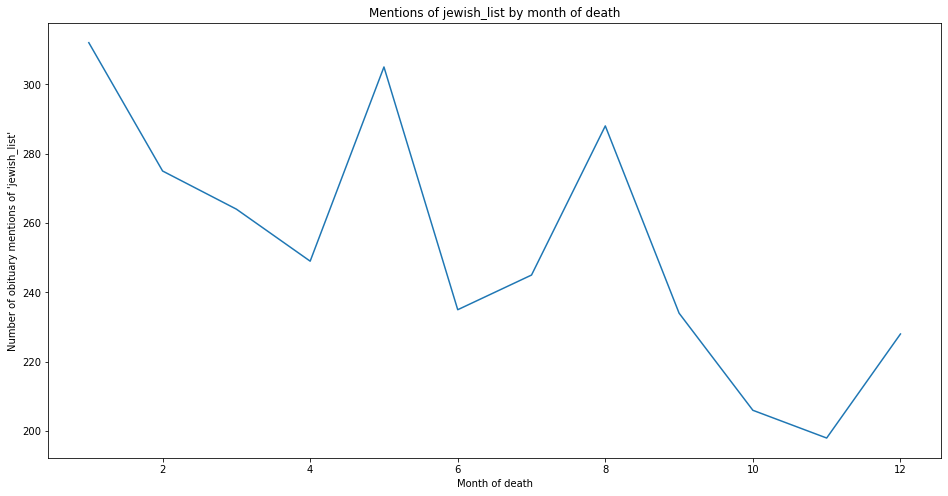

In [36]:
jewish_words = ['jew', 'jewish', 'shiva']

dcdf = get_counts(dcdf, keywords = jewish_words, list_input=True, varname='jewish_list')

### Funeral homes

Keywords: ['Austin Royster Funeral Home', 'B K Henry Funeral Chapel', 'B.K. Henry Funeral Home', 'BK Henry Funeral Home', 'BACON FUNERAL HOME', 'Bianchi Funeral Service', 'Bonnette & Associates', 'Bonnette and Associates', 'Capitol Mortuary Inc', 'Columbia Heights Funeral Home', 'DeVol Funeral Home', 'Dunn & Sons Funeral Home', 'Dunn and Sons Funeral Home', "Frazier's Funeral Home", 'Grace Murray Funeral Home', "Hackett's Funeral Chapel", 'Hall Brothers Funeral Home', 'Henry S. Washington & Sons Funeral Home', 'Henry S. Washington and Sons Funeral Home', 'Hunt Funeral Home', 'Hysong Funeral Home', 'John T Rhines Funeral Home', 'Johnson & Jenkins', 'Johnson and Jenkins', 'Jordan Funeral Services', "Joseph Gawler's Sons", "Latney's Funeral Home", "Marshall's Funeral Home", 'McGuire Funeral Service', 'Michael R Gray Funeral Home', 'Murray Tellington Funeral Home', 'Pinckney-Spangler Funeral Home', 'Pope Funeral Home', "R.N. Horton's Funeral Home", 'Reid Funeral Home', 'RIDLEY FUNERAL ESTA

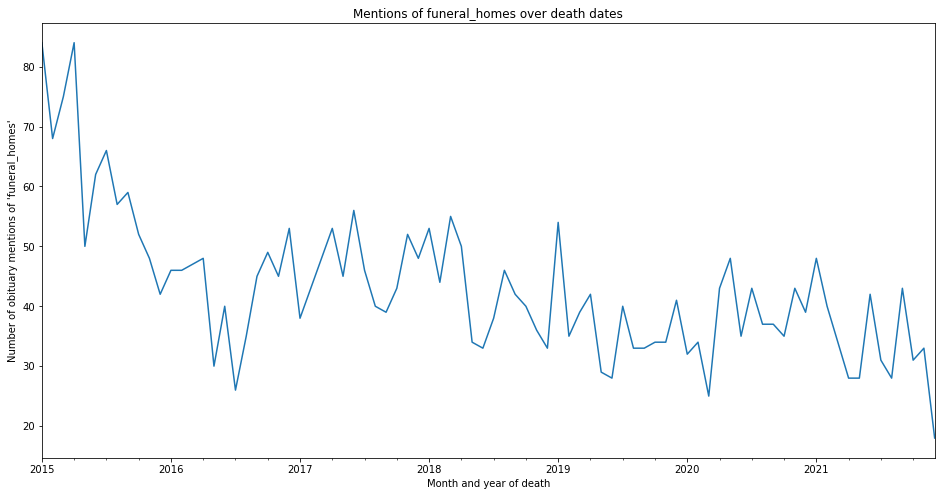

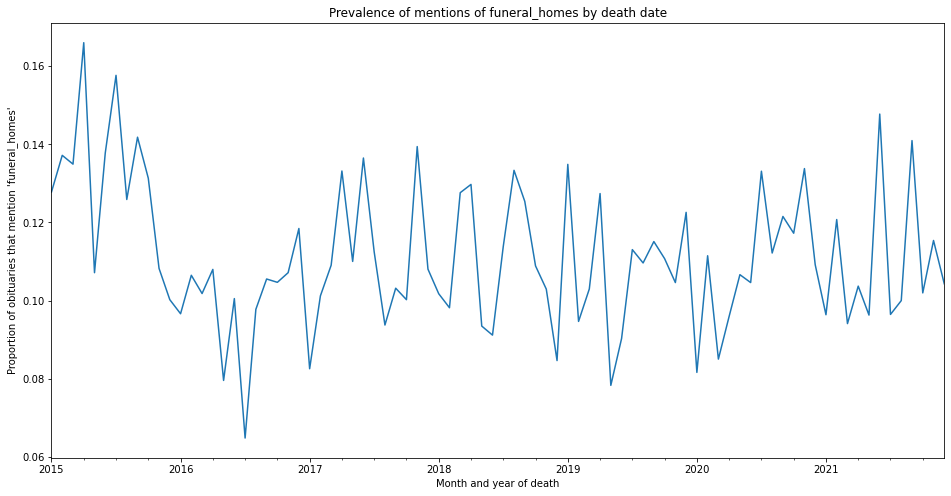

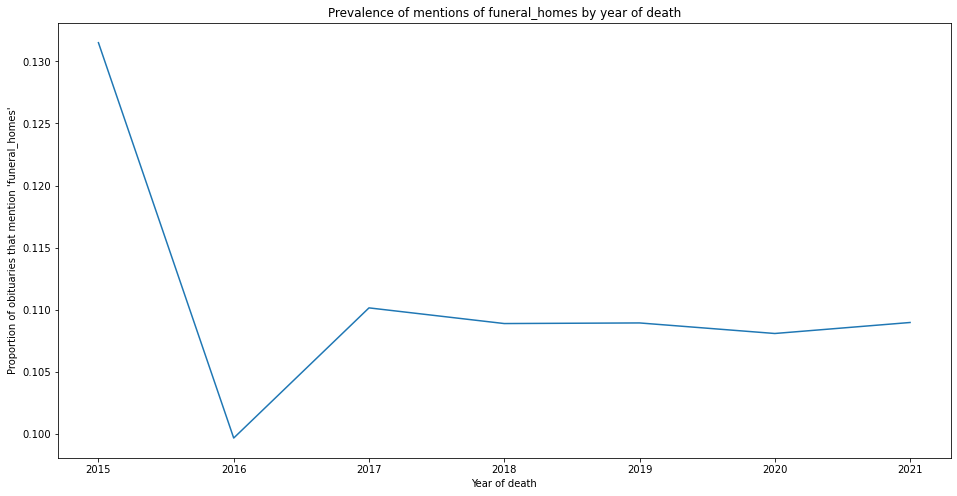

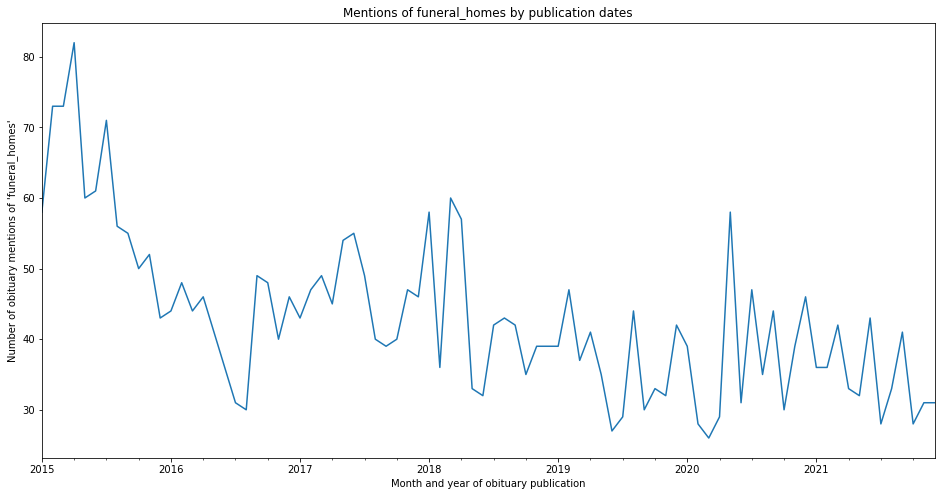

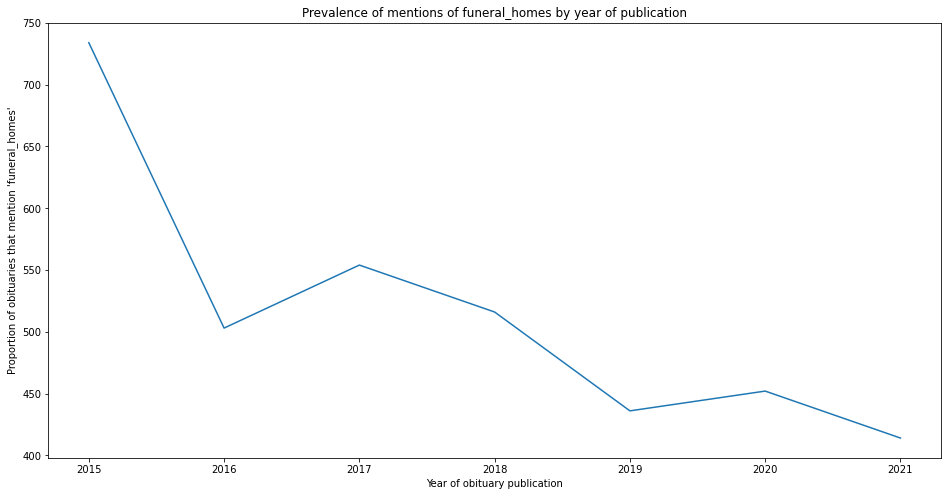

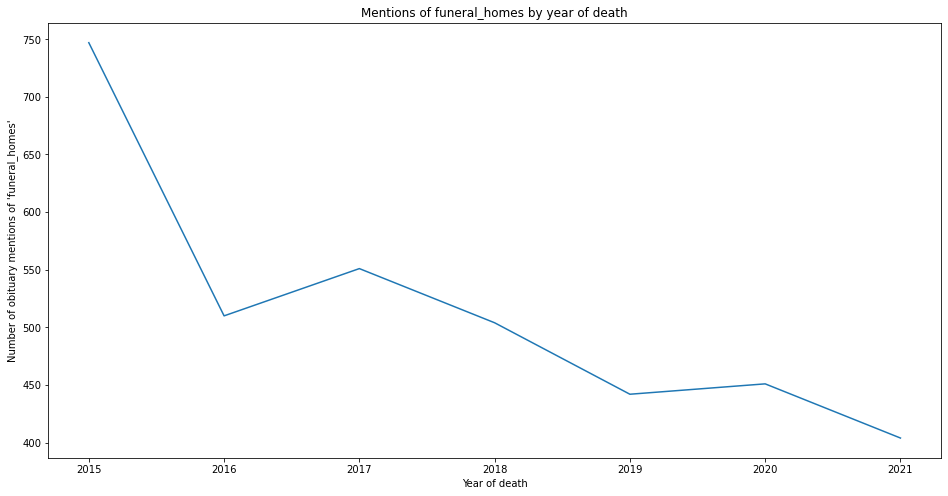

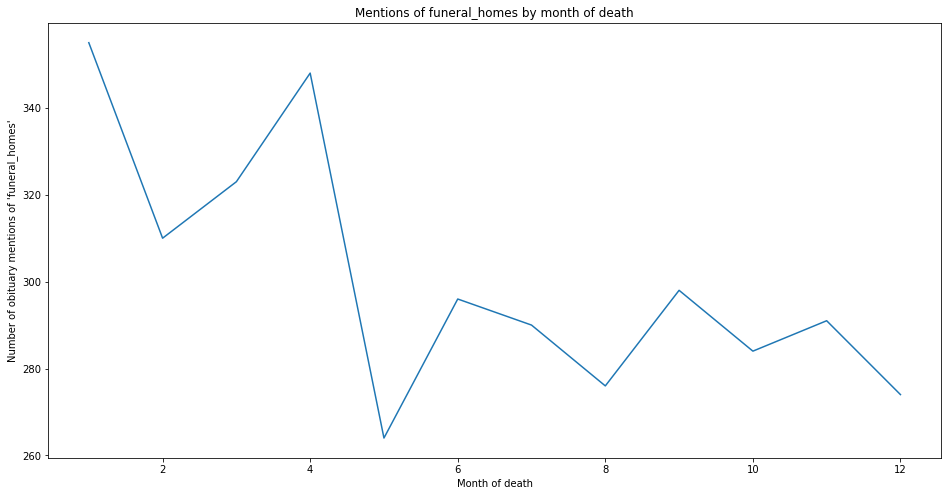

In [37]:
dcdf = get_counts(dcdf, keywords = funeral_homes.tolist(), list_input=True, varname='funeral_homes')